## Assignment 1 : ML DATA CLEANING AND FEATURE SELECTION

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

**Numeric Features:**
1.	ID: Customer's unique identifier
2.	Year_Birth: Customer's birth year
3.	Income: Customer's yearly household income
4.	Kidhome: Number of children in customer's household
5.	Teenhome: Number of teenagers in customer's household
6.	Recency: Number of days since customer's last purchase
7.	MntWines: Amount spent on wine in the last 2 years
8.	MntFruits: Amount spent on fruits in the last 2 years
9.	MntMeatProducts: Amount spent on meat in the last 2 years
10.	MntFishProducts: Amount spent on fish in the last 2 years
11.	MntSweetProducts: Amount spent on sweets in the last 2 years
12.	MntGoldProds: Amount spent on gold in the last 2 years
13.	NumDealsPurchases: Number of purchases made with a discount
14.	NumWebPurchases: Number of purchases made through the company’s website
15.	NumCatalogPurchases: Number of purchases made using a catalogue
16.	NumStorePurchases: Number of purchases made directly in stores
17.	NumWebVisitsMonth: Number of visits to company’s website in the last month
18.	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
19.	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
20.	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
21.	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
22.	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
23.	Complain: 1 if the customer complained in the last 2 years, 0 otherwise
24.	Z_CostContact: Constant value (according to the provided data types)
25.	Z_Revenue: Constant value (according to the provided data types)
26.	Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Categorical Features:**
1.	Education: Customer's education level
2.	Marital_Status: Customer's marital status
3.	Dt_Customer: Date of customer's enrollment with the company


##**Abstract**

An abstract is:

  What is the question?

  What did you do?

  What were the results?

Data cleaning techniques and feature selection methods most effectively improve the predictive accuracy of a machine learning model using the Customer Personality Analysis dataset.

The research involved analyzing the dataset to determine data types, identify missing values, and understand the distributions of numeric variables. Methods used included three different feature selection techniques to identify key independent variables for prediction, analyzing missing data in independent variables, comparing training and test sets, and assessing the independence and importance of predictor variables. Additionally, the study experimented with removing outliers and random data removal (1%, 5%, and 10%) followed by data imputation using three different methods.

The analysis revealed specific independent variables that significantly impact the model's predictive accuracy. The experiment with outlier management indicated a notable influence on model performance. Data imputation methods demonstrated varying levels of effectiveness in recovering missing values and maintaining model accuracy. The study concluded that strategic data cleaning and informed feature selection are crucial in optimizing the performance of machine learning models in customer personality analysis.

In [102]:
!pip install eli5

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from scipy import stats
import plotly.express as px
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import silhouette_score, calinski_harabasz_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from sklearn.metrics import r2_score

In [104]:
# Importing the csv files from github and storing in dataframe
# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/mrunalipawar97/DSE/main/marketing_campaign.csv", header=0, delimiter='\t')


In [105]:
# displaying data in the file
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [106]:
# Check data types
data_types = data.dtypes
print(data_types)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [107]:
#To check all the columns and their datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Identify numeric columns and categorical columns.

In [108]:
# Listing numerical and categorical features from our dataset.
numerical_feats = data.select_dtypes(include=['number']).columns.tolist()
categorical_feats = data.select_dtypes(include=['object']).columns.tolist()

# Print numeric data types
print("Numeric Data Types:")
print(numerical_feats)

# Print categorical data types
print("\nCategorical Data Types:")
print(categorical_feats)

Numeric Data Types:
['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

Categorical Data Types:
['Education', 'Marital_Status', 'Dt_Customer']


In [109]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Dropping columns because they will not contribute anything in model building

In [110]:
data=data.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


checking if the any data is missing

In [111]:
missing_values = data.isnull().sum()

print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
Income    24
dtype: int64


In [112]:
# Which independent variables have missing data? How much?
print(
    "Percent of Missing Data -  Income Coloumn = "
    + str((data["Income"].isnull().sum() / len(data)) * 100)
    + " %"
)

Percent of Missing Data -  Income Coloumn = 1.0714285714285714 %



Only 1 Missing Data from column, as they are under 50%(even under 21%), the best desion is to do not drop them and fill them.

In [113]:
# Using mode method to impute categorical data
# Replaced missing values in 'Income' column with the median (as it's a numerical column)
data['Income'] = data['Income'].fillna(data['Income'].mean())
data.isna().any()
data.isnull().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

The dataset is clean and ready for further analysis or model building

In [114]:
# Checking number of unique categories present in the "Marital_Status"

data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [115]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In the above cell I'm grouping 'Married', 'Together' as "relationship"

Whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' as "Single"

This distribution can provide insights into the customer base, which can be valuable for marketing strategies and customer relationship management.

In [116]:
#Count of different values present in Marital_Status

data['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [117]:
# Combining different dataframe into a single column to reduce the number of dimension

data['Kids'] = data['Kidhome'] + data['Teenhome']
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

1. Kids: Combining 'Kidhome' and 'Teenhome' into a single 'Kids' column provides a total count of children in the household, which is a more consolidated view of the household's composition.

2. Expenses: Summing up all the spending columns into 'Expenses' gives a comprehensive view of the total spending of a customer. This can be a very relevant feature for understanding customer behavior and segmentation.

3. TotalAcceptedCmp: Adding up all the 'AcceptedCmpX' columns and 'Response' into 'TotalAcceptedCmp' offers insight into the total number of campaigns a customer responded positively to. This feature can be particularly useful for analyzing customer responsiveness and engagement.

4. NumTotalPurchases: Combining various purchase columns into 'NumTotalPurchases' provides a total view of a customer's purchasing behavior across different channels. This holistic measure can be more informative than individual purchase types for some analyses.

In [118]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data = data.drop(columns=col_del,axis=1)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,0,2,27,0,6
2,4141,1965,Graduation,relationship,71613.0,21-08-2013,26,0,0,776,0,21
3,6182,1984,Graduation,relationship,26646.0,10-02-2014,26,0,1,53,0,8
4,5324,1981,PhD,relationship,58293.0,19-01-2014,94,0,1,422,0,19


In [119]:
# Adding a column "Age" in the dataframe as Age can be a significant factor in many analyses, especially in understanding customer behavior, preferences, and segmentation

data['Age'] = 2015 - data["Year_Birth"]

In [120]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

 It is integral to understanding the educational landscape of dataset, which is a key demographic factor. It sets the stage for more detailed analysis and decision-making regarding data processing and modeling strategies.

In [121]:
# Changing category into UG and PG only
data['Education'] = data['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
data['Education'] = data['Education'].replace(['Basic'], 'UG')

By reducing the number of categories, I'm simplify the model's input space, which can help in avoiding overfitting and improving model interpretability.

In [122]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
data['first_day'] = pd.to_datetime('01-01-2015', format='%d-%m-%Y')
data['day_engaged'] = (data['first_day'] - data['Dt_Customer']).dt.days

calculates the number of days between the customer's enrollment date and the reference date, giving the duration of each customer's engagement with the company in days. This is useful in  understanding customer loyalty, analyzing purchasing behavior over time, or segmenting customers based on engagement duration

In [123]:
data=data.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
data.shape

(2240, 9)

In [124]:
fig = px.bar(data, x='Marital_Status', y='Expenses', color="Education")
fig.show()

It provides a comparative analysis of customer expenses based on marital status and education level. It visualizes the total expenses of customers grouped by marital status and further distinguished by their level of education.

In [125]:
fig = px.bar(data, x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()

The red bar is taller, customers in a relationship might be spending more than single customers. This can provide insights into spending behavior associated with marital status.
This chart could be used to argue that marital status may have an impact on consumer spending habits, which could be valuable information for targeted marketing campaigns or customer relationship management.

In [126]:
# Less number of single customer
fig = px.histogram (data, x = "Expenses",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

The histogram provides a visual representation of the distribution of expenses among customers categorized by marital status. With this histograms, one can compare the spending behavior of single customers versus those in a relationship.

In [127]:
fig = px.histogram (data, x = "Expenses",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

The visualization enables a direct comparison of spending behaviors between customers with different educational backgrounds. For instance, the 'PG' group's histogram has bars that are generally higher or extend further to the right than the 'UG' group, this suggests that postgraduates spend more.
Postgraduate customers might be targeted with higher-value products or offers as they demonstrate higher spending.

In [128]:
fig = px.histogram (data, x = "NumTotalPurchases",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

 This visualization can offer insights into how education level influences purchasing behavior. With the data segmented by education level, I can compare the purchasing patterns between customers with postgraduate education and those with undergraduate education

In [129]:
fig = px.histogram (data, x = "Age",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

By comparing the age distributions across different marital statuses, I find that certain age ranges are more prevalent in certain marital categories. For example, younger customers might be predominantly single, while a wider age range might be observed for married customers.

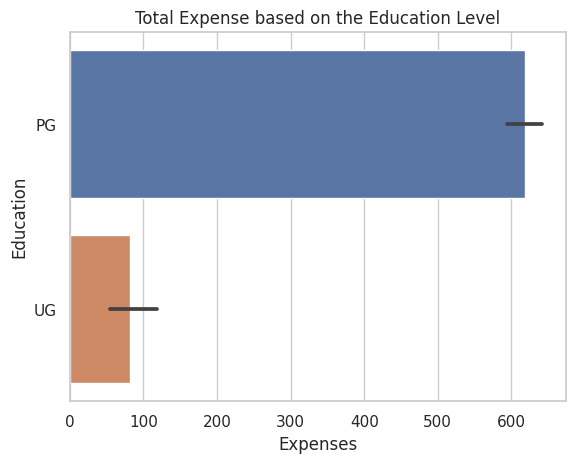

In [130]:
sns.barplot(x = data['Expenses'],y = data['Education']);
plt.title('Total Expense based on the Education Level');

The bar plot visualizes the average total expenses incurred by customers, categorized by their educational attainment.

This difference in spending behavior underscores the potential influence of education level on consumer expenditure and could have implications for targeted marketing strategies.

In [131]:
data.describe()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.950446,605.798214,0.446875,14.862054,46.194196,539.582143
std,25037.797168,0.751803,602.249288,0.890543,7.677173,11.984069,202.122512
min,1730.000000,0.000000,5.000000,0.000000,0.000000,19.000000,186.000000
25%,35538.750000,0.000000,68.750000,0.000000,8.000000,38.000000,366.750000
50%,51741.500000,1.000000,396.000000,0.000000,15.000000,45.000000,541.500000
75%,68289.750000,1.000000,1045.500000,1.000000,21.000000,56.000000,715.000000
max,666666.000000,3.000000,2525.000000,5.000000,44.000000,122.000000,885.000000


In [132]:
cate = []
for i in data.columns:
    if (data[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


In [133]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [134]:
data['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

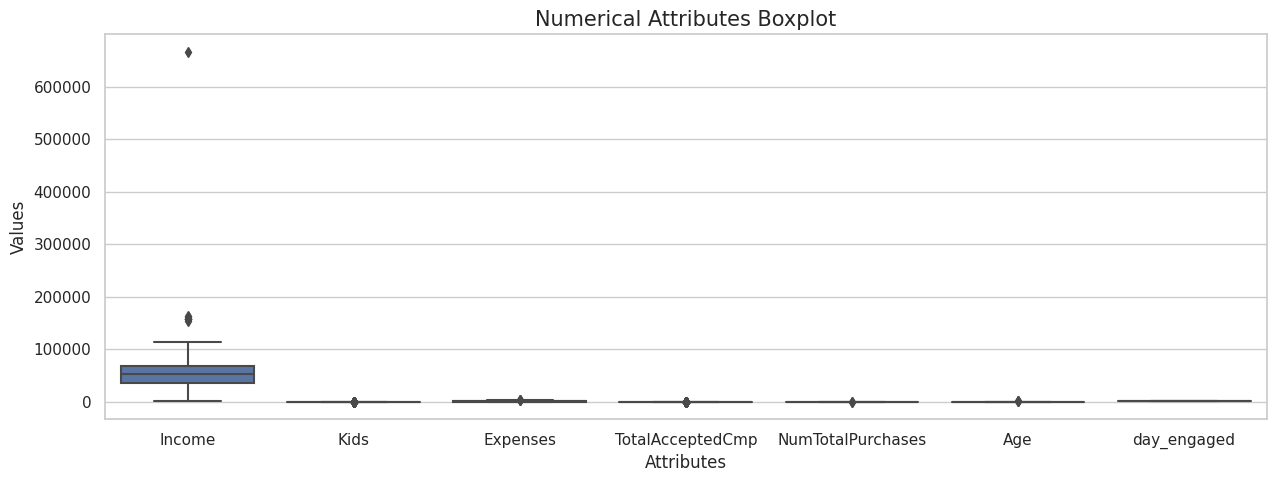

In [135]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")

# Assuming 'data' is your DataFrame containing 'Income', 'Kids', 'Expenses', and 'Age' columns
sns.boxplot(data=data[['Income','Kids','Expenses','TotalAcceptedCmp','NumTotalPurchases','Age','day_engaged']])
plt.xlabel("Attributes", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Numerical Attributes Boxplot", fontsize=15)
plt.show()

'Income' varies widely among customers, with a distribution that suggests the presence of high earners, as indicated by the outliers above the upper whisker.

The 'Kids' attribute shows a tight distribution, implying that most customers have a similar number of children, with few outliers.

'Expenses' also display a broad range, indicating variability in customer spending habits.

'TotalAcceptedCmp' and 'NumTotalPurchases' show several outliers, suggesting that while most customers engage with campaigns and make purchases within a typical range, there are some who are significantly more active.

The 'Age' distribution is relatively even, with fewer outliers, suggesting a diverse but consistent customer age profile.

Lastly, 'day_engaged' shows a wide range, indicating varying lengths of customer engagement with the company.

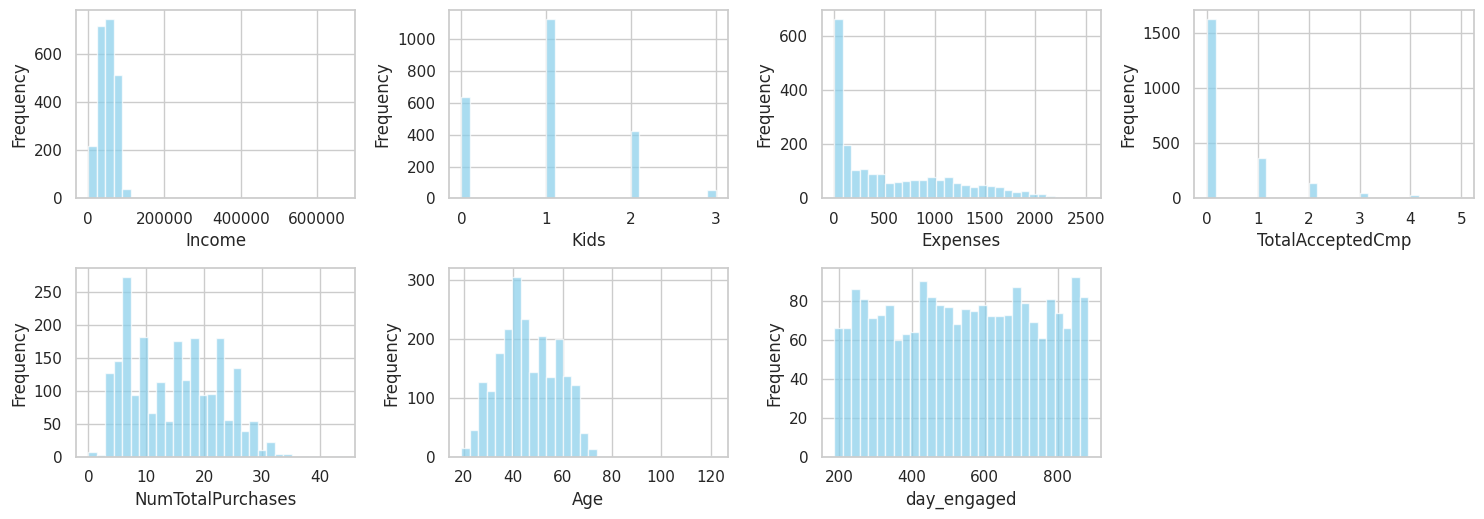

In [136]:
numeric_features = ['Income','Kids','Expenses','TotalAcceptedCmp','NumTotalPurchases','Age','day_engaged']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    plt.hist(data[feature], bins=30, color='skyblue', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

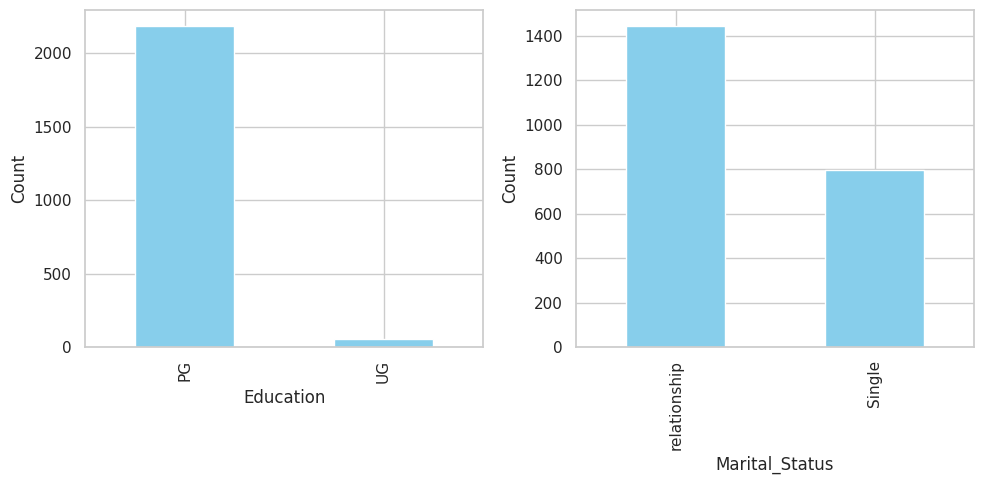

In [137]:
categorical_features = ['Education', 'Marital_Status']

plt.figure(figsize=(10, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    data[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [138]:
raw_df = data.copy()

In [139]:
data = raw_df.copy()

In [140]:
# As it is only 24 out of 2240 data points , we can drop it. but i want to impute it using Education and year_birth and income:
imputer = KNNImputer(n_neighbors=10)

x = data[['Age', 'Income']]

# now we can Impute our null values:
x_imputed = imputer.fit_transform(x)

# make dataframe
x_imputed = pd.DataFrame(x_imputed, columns = x.columns)

#replace the Income column from x in original 'data':
data['Income'] = x_imputed['Income']

By using the KNN imputer, I'm taking into account the correlation between 'Age' and 'Income' to predict the missing 'Income' values more accurately than simple imputation methods such as mean or median imputation.

In [141]:
data.describe()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.950446,605.798214,0.446875,14.862054,46.194196,539.582143
std,25037.797168,0.751803,602.249288,0.890543,7.677173,11.984069,202.122512
min,1730.000000,0.000000,5.000000,0.000000,0.000000,19.000000,186.000000
25%,35538.750000,0.000000,68.750000,0.000000,8.000000,38.000000,366.750000
50%,51741.500000,1.000000,396.000000,0.000000,15.000000,45.000000,541.500000
75%,68289.750000,1.000000,1045.500000,1.000000,21.000000,56.000000,715.000000
max,666666.000000,3.000000,2525.000000,5.000000,44.000000,122.000000,885.000000


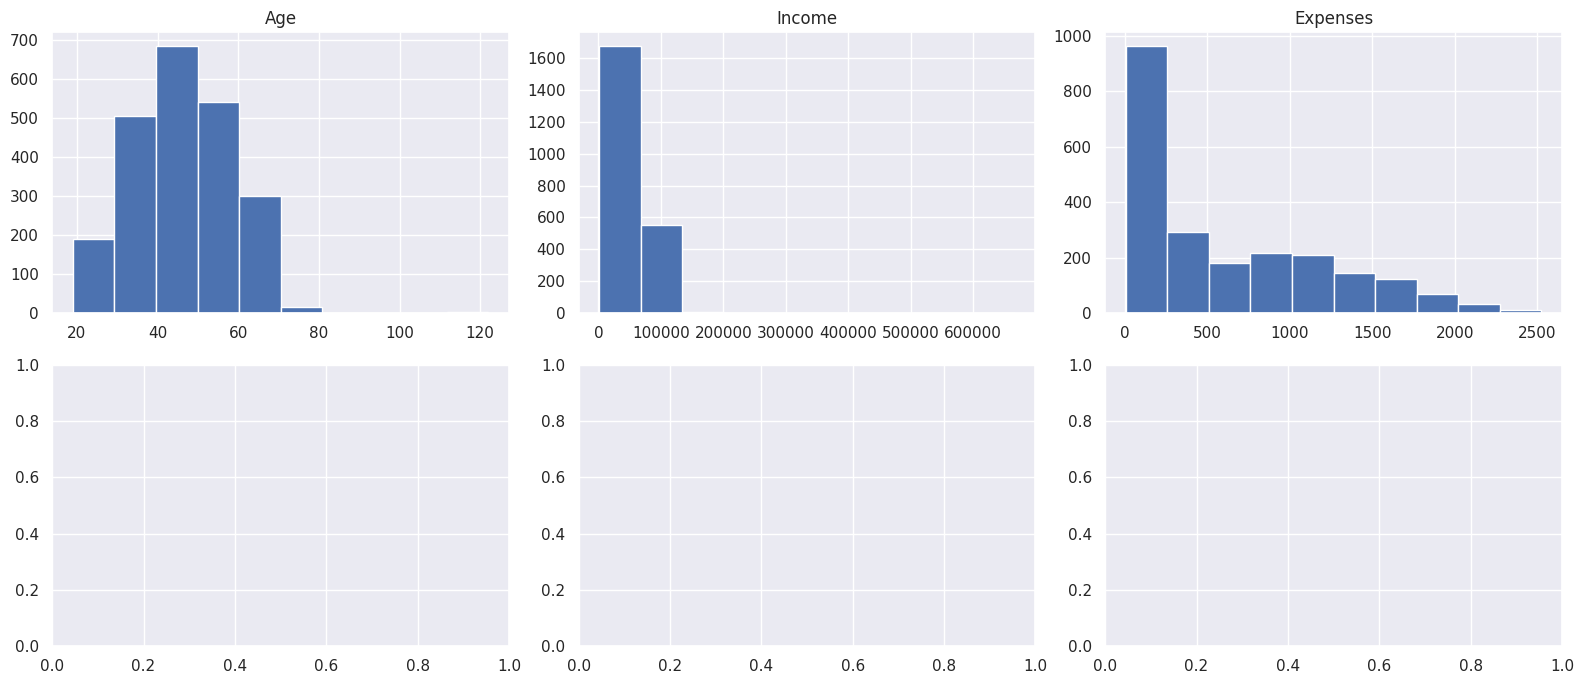

In [142]:
#Let's see what is going on in Age, Income, and Expenses in different sections:
sns.set()
fig, axes = plt.subplots(2, 3, figsize=(16,7))

axes[0,0].hist(data['Age'])
axes[0,0].set_title('Age')

axes[0,1].hist(data['Income'])
axes[0,1].set_title('Income')

axes[0,2].hist(data['Expenses'])
axes[0,2].set_title('Expenses')


plt.tight_layout()

In [143]:
# Calculate the upper bounds based on the original dataset
# removing 0.5% from the upper side of 'Age' column
upper_bound_age = np.percentile(data['Age'], 99.5)
# removing 0.5% from the upper side of 'Income' column
upper_bound_income = np.percentile(data['Income'], 99.5)

# Apply the filters independently
data = data[(data['Age'] <= upper_bound_age) & (data['Income'] <= upper_bound_income)]

Here I'm effectively trimming the most extreme 0.5% of values from the upper end of both the 'Age' and 'Income' distributions. This is for handling outliers that may skew the results of statistical analyses or machine learning models.

(array([ 35., 118., 283., 351., 331., 332., 344., 271., 128.,  23.]),
 array([  1730.,  11754.,  21778.,  31802.,  41826.,  51850.,  61874.,
         71898.,  81922.,  91946., 101970.]),
 <BarContainer object of 10 artists>)

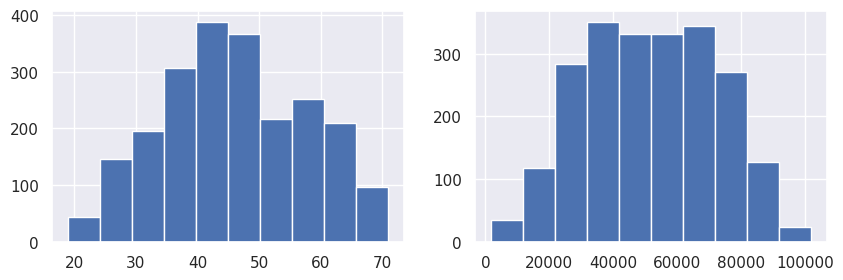

In [144]:
sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

ax1.hist(data['Age'])
ax2.hist(data['Income'])

**Much Better result just by removing 24 rows equal to 1% of the data.**

The adjacent histograms provide a visual summary of the distributions of 'Age' and 'Income' within the dataset. The 'Age' distribution on the left indicates a fairly symmetrical distribution, with the bulk of the dataset's customers falling into a central age range, suggesting a middle-aged customer base. The relatively smooth decrease in counts as age increases suggests a younger customer base is less prevalent than middle-aged individuals within the dataset.

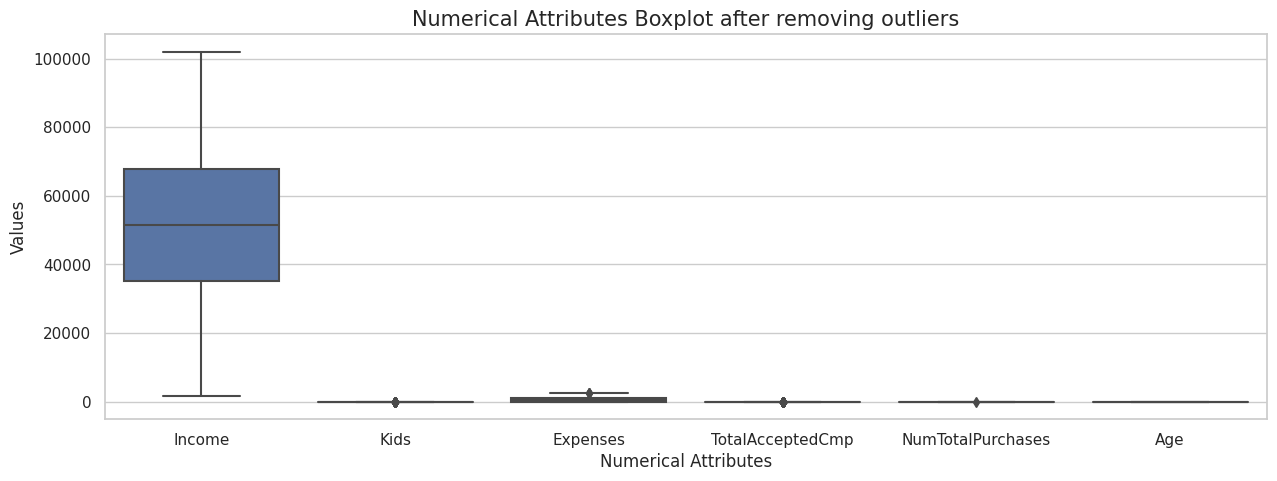

In [145]:
numerical_feats = ['Income','Kids','Expenses','TotalAcceptedCmp','NumTotalPurchases','Age','day_engaged']
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=data[numerical_feats[:-1]])  # outliers are ignore to be plotted
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot after removing outliers", fontsize= 15)
plt.show()

<Axes: >

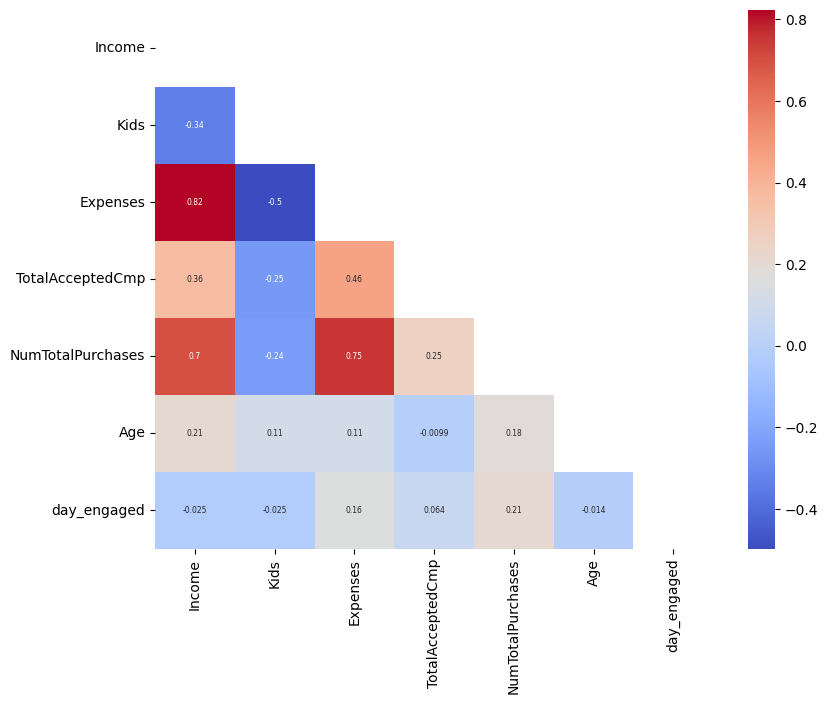

In [146]:
sns.reset_orig()
plt.figure(figsize=(9,7))

# how features are correlated?
corr = data.corr(numeric_only = True)

# removing the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# color map for better visualization
cmap = sns.color_palette('coolwarm', as_cmap = True)

#
sns.heatmap(corr, cmap = cmap, mask = mask, annot=True, annot_kws={'fontsize':5.5})

The heatmap provides a visual representation of the strength and direction of the linear relationship between pairs of numerical attributes in the dataset. The color intensity reflects the magnitude of the correlation, with red indicating a strong positive correlation, blue indicating a strong negative correlation, and white indicating no correlation.

* A strong positive correlation is observed between 'Expenses' and 'TotalAcceptedCmp', suggesting that higher expenses are associated with a higher number of accepted campaigns, which may indicate that more engaged customers tend to spend more.

* 'NumTotalPurchases' also shows a significant positive correlation with 'Expenses', indicating that customers who make more purchases also tend to have higher total expenses.

* 'Age' shows little to no correlation with most variables, implying that customer age does not significantly influence spending habits, campaign acceptance, or the number of purchases.

* The 'day_engaged' variable shows a very slight negative correlation with 'Income', which could suggest that customers with higher incomes might be newer to the company, although the correlation is very weak and warrants further investigation.

In [147]:
# After fixing outliers, lets normalize them so that all the features are in same class

# Using MinMaxScaler to normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[numerical_feats[:-1]] = pd.DataFrame(scaler.fit_transform(data[numerical_feats[:-1]].values), columns=numerical_feats[:-1], index=data.index)

Applying normalization to the numerical features of your dataset using the MinMaxScaler from scikit-learn, which is a common preprocessing step in machine learning.
scaled data assigned back to the corresponding columns in the original DataFrame, effectively replacing the original values with the normalized ones.

In [148]:
data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,PG,Single,0.562729,0.000000,0.639683,0.2,0.581395,0.750000,849
1,PG,Single,0.445072,0.666667,0.008730,0.0,0.139535,0.807692,299
2,PG,relationship,0.697157,0.000000,0.305952,0.0,0.488372,0.596154,498
3,PG,relationship,0.248563,0.333333,0.019048,0.0,0.186047,0.230769,325
4,PG,relationship,0.564276,0.333333,0.165476,0.0,0.441860,0.288462,347


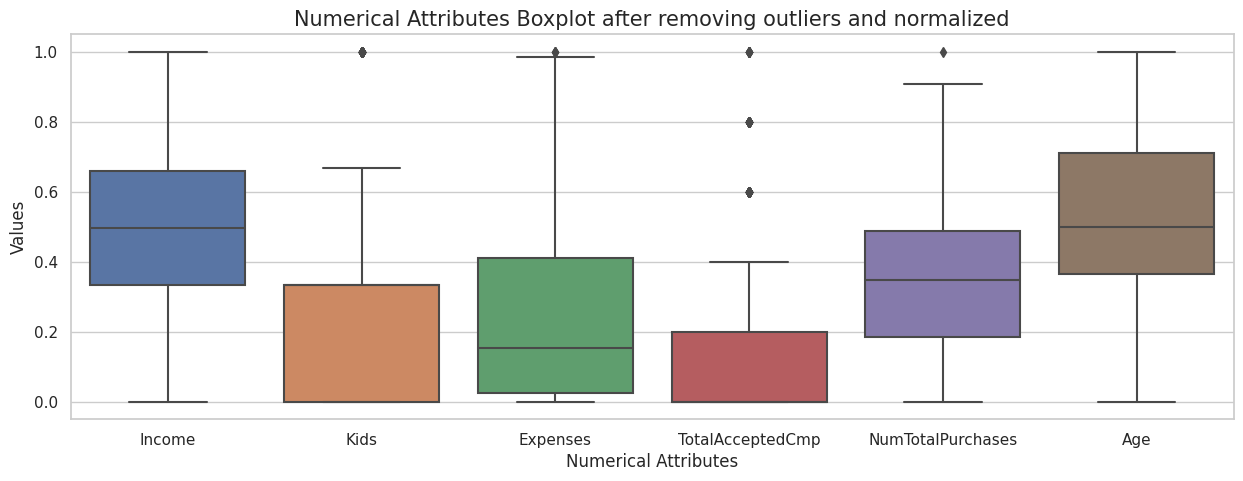

In [149]:
numerical_feats = ['Income','Kids','Expenses','TotalAcceptedCmp','NumTotalPurchases','Age','day_engaged']
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=data[numerical_feats[:-1]])  # outliers are ignore to be plotted
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot after removing outliers and normalized", fontsize= 15)
plt.show()

The resulting plot shows boxplots for each of the specified numerical attributes, with outliers excluded and the data normalized

Normalization:

Normalization brings down all the features scales to [0 to 1] as it uses minimum and maximum value in each feature.

Normalization = (X - Xmin) / (Xmax - Xmin).

<Axes: >

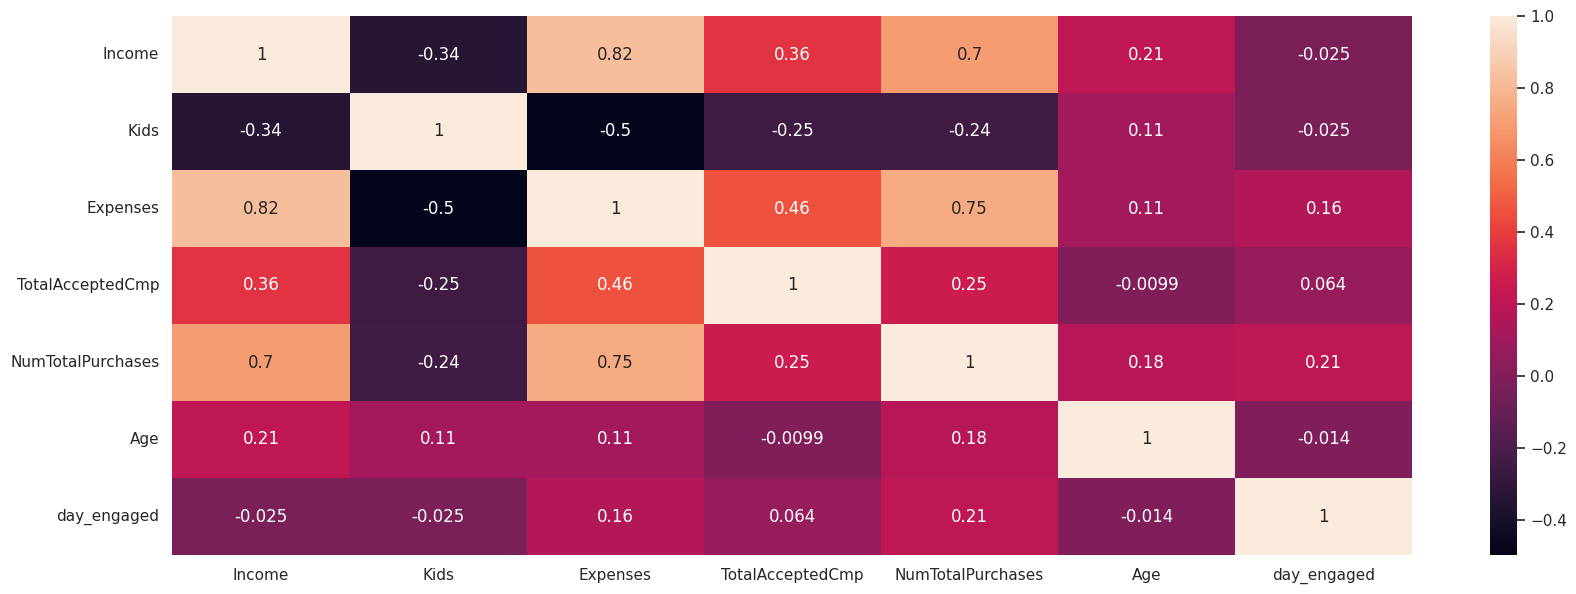

In [150]:
# Displaying the correlated data using heatmap
numerical_feats
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_feats].corr(), annot=True)

Heatmap represents the correlation matrix of a dataset. Correlation values range from -1 to 1, where:

* A value close to 1 implies a strong positive correlation: as one feature increases, the other feature tends to also increase.
* A value close to -1 implies a strong negative correlation: as one feature increases, the other feature tends to decrease.
* A value around 0 implies little to no linear relationship between the features.

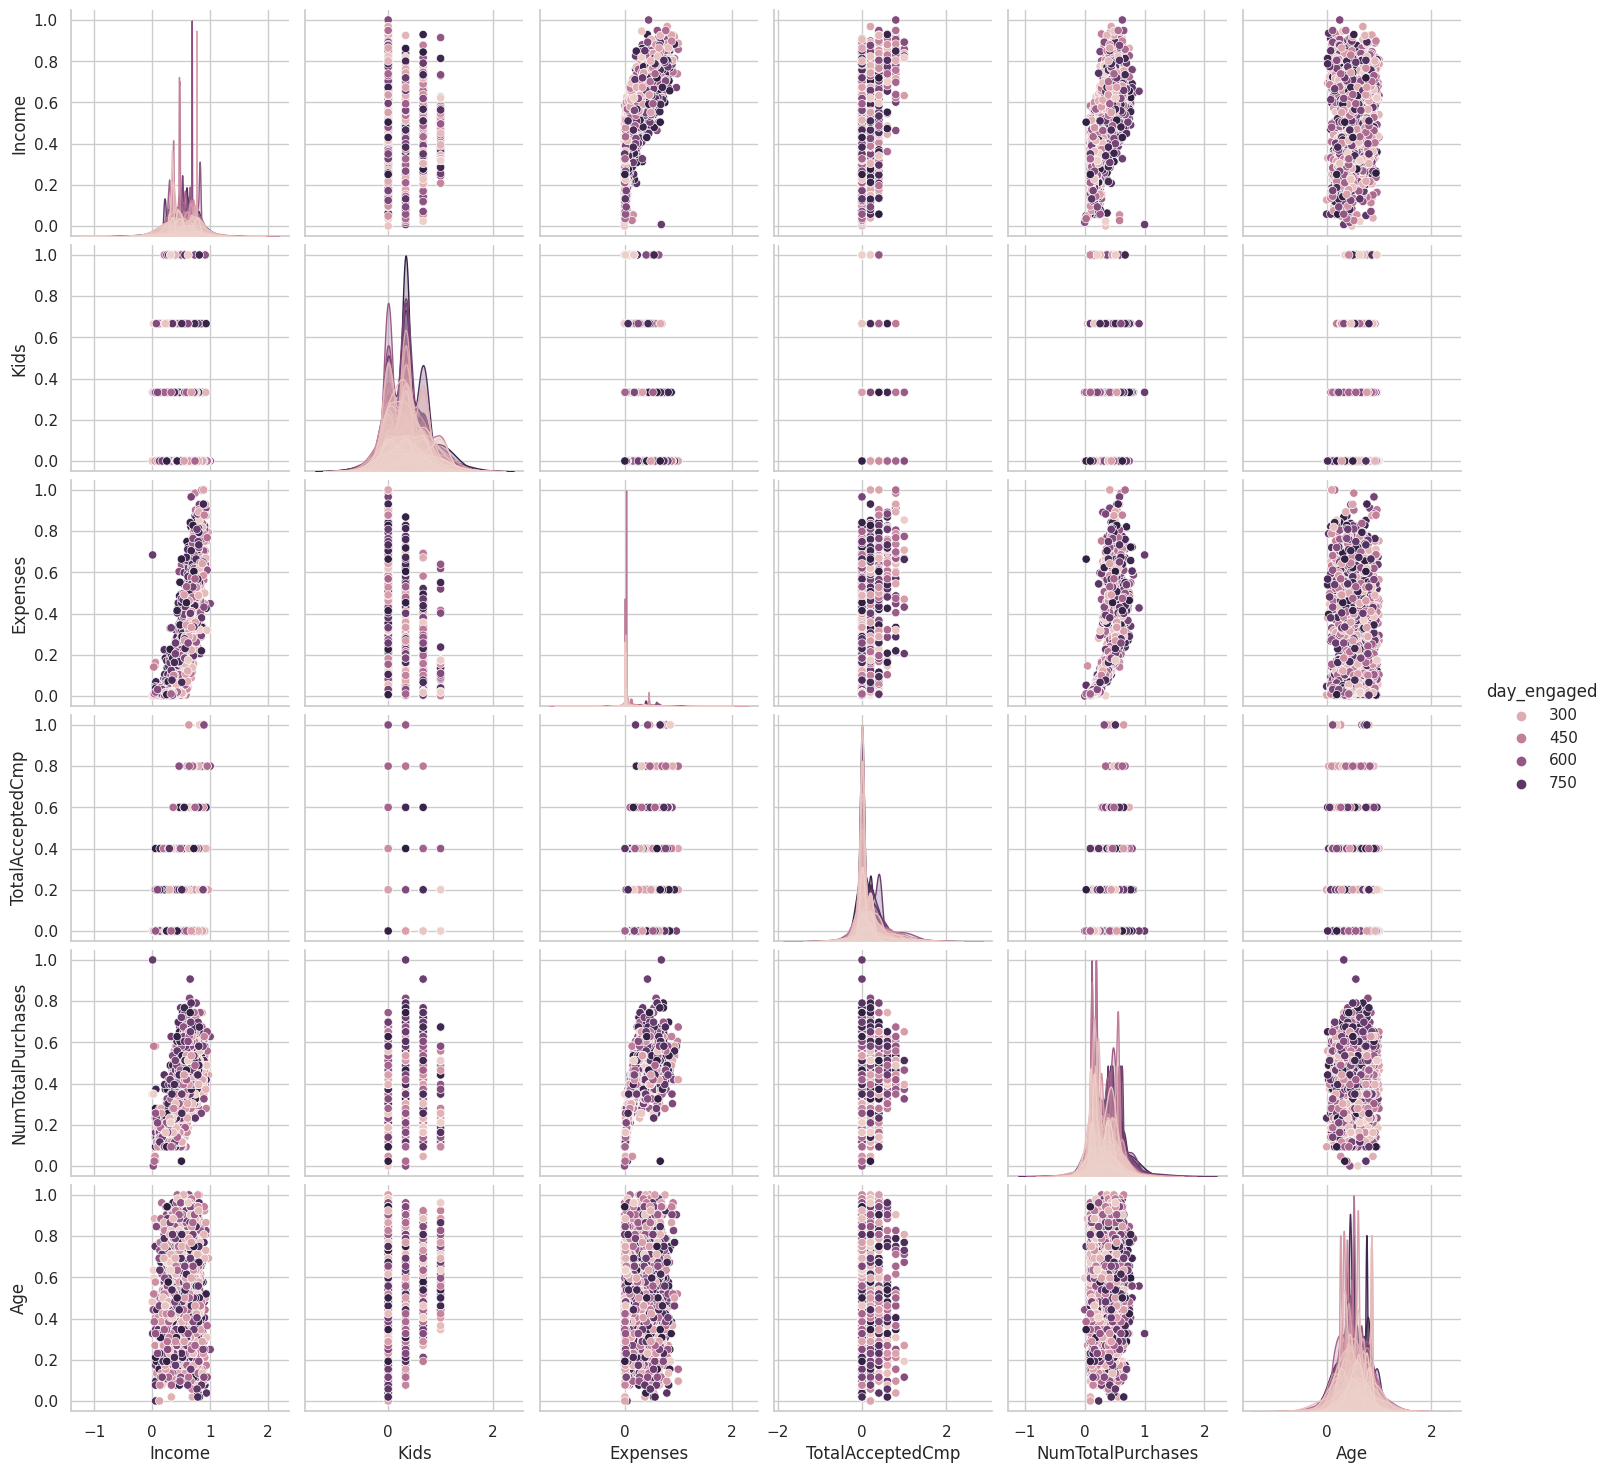

In [151]:
#Target = 'Response'

# Create the pairplot
sns.pairplot(data[numerical_feats], diag_kind='kde',  hue="day_engaged")

KDE plots show the distribution of a single variable and are used here instead of histograms. The peaks of the KDE plots represent the most common values (or the mode) of the variable.

There's a considerable overlap in data points across the different values of "day_engaged," making it difficult to discern clear patterns related to "day_engaged." For the distributions along the diagonal, the KDE plots suggest that some variables have a relatively uniform distribution (flat KDEs), while others might have more specific ranges where they are more common (peaked KDEs)

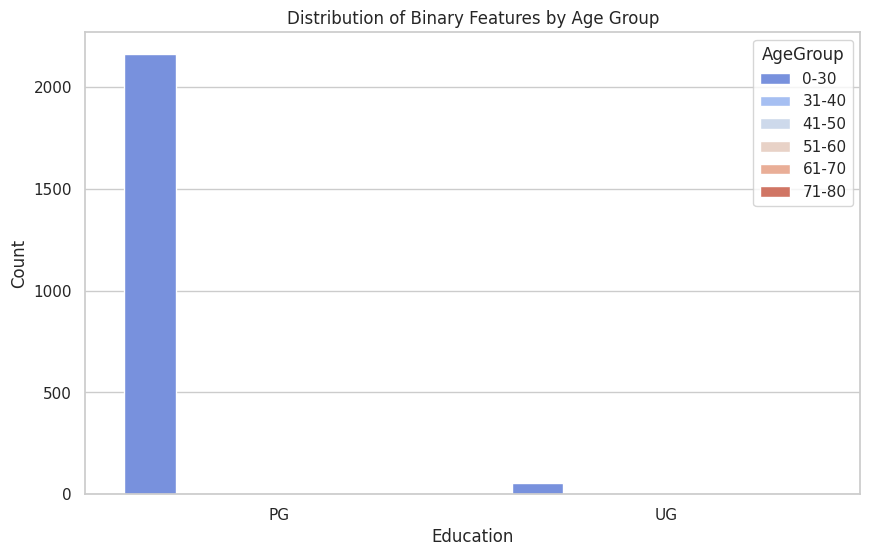

In [152]:
# Assuming 'data' is  DataFrame and 'Education' is a categorical feature

# Assuming 'data' is your DataFrame containing binary features

# First, we need to bin the 'Age' data into categories
age_bins = [0, 30, 40, 50, 60, 70, 80]  # Define your age bins
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80']  # Define your age labels
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Now, create the countplot with the binned age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='AgeGroup', data=data, palette='coolwarm', dodge=True)
plt.title('Distribution of Binary Features by Age Group')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

Bin4    437
Bin5    363
Bin6    299
Bin7    287
Bin8    258
Bin3    255
Bin2    178
Bin9     96
Bin1     43
Name: AgeGroup, dtype: int64


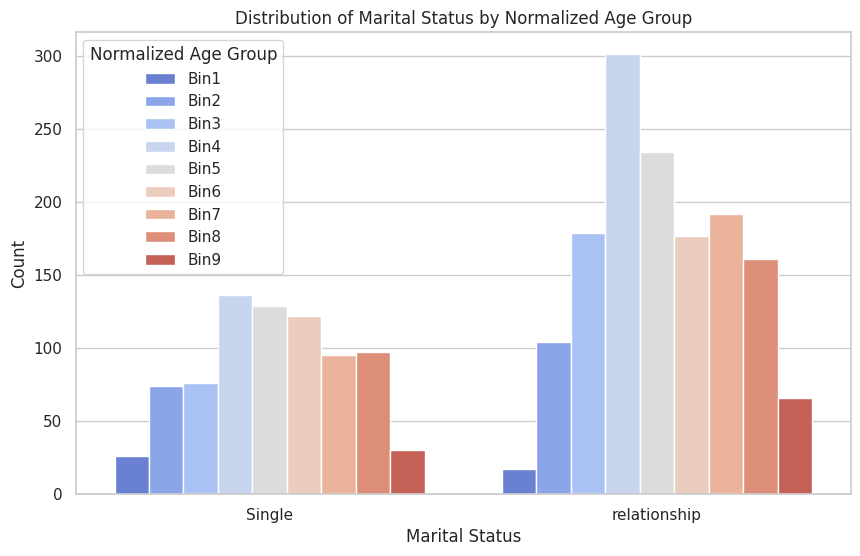

In [153]:
# Assuming 'data' is your DataFrame and it contains 'Marital_Status' and 'Age' columns
# Define bins for the normalized age data
age_bins = np.linspace(0, 1, num=10)  # Creates 9 bins between 0 and 1
age_labels = ['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5', 'Bin6', 'Bin7', 'Bin8', 'Bin9']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Check the value counts again
print(data['AgeGroup'].value_counts())

# Now, create the countplot with the new 'AgeGroup' categories as the hue
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='AgeGroup', data=data, palette='coolwarm', dodge=True)
plt.title('Distribution of Marital Status by Normalized Age Group')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Normalized Age Group')
plt.show()

The 'Single' category might have higher counts in certain age bins compared to the 'relationship' category.

'Bin6' is a common age group for 'Single', and there appears to be a trend where certain bins are more or less common in the 'relationship' category.

<ipython-input-154-2315fe819ff6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



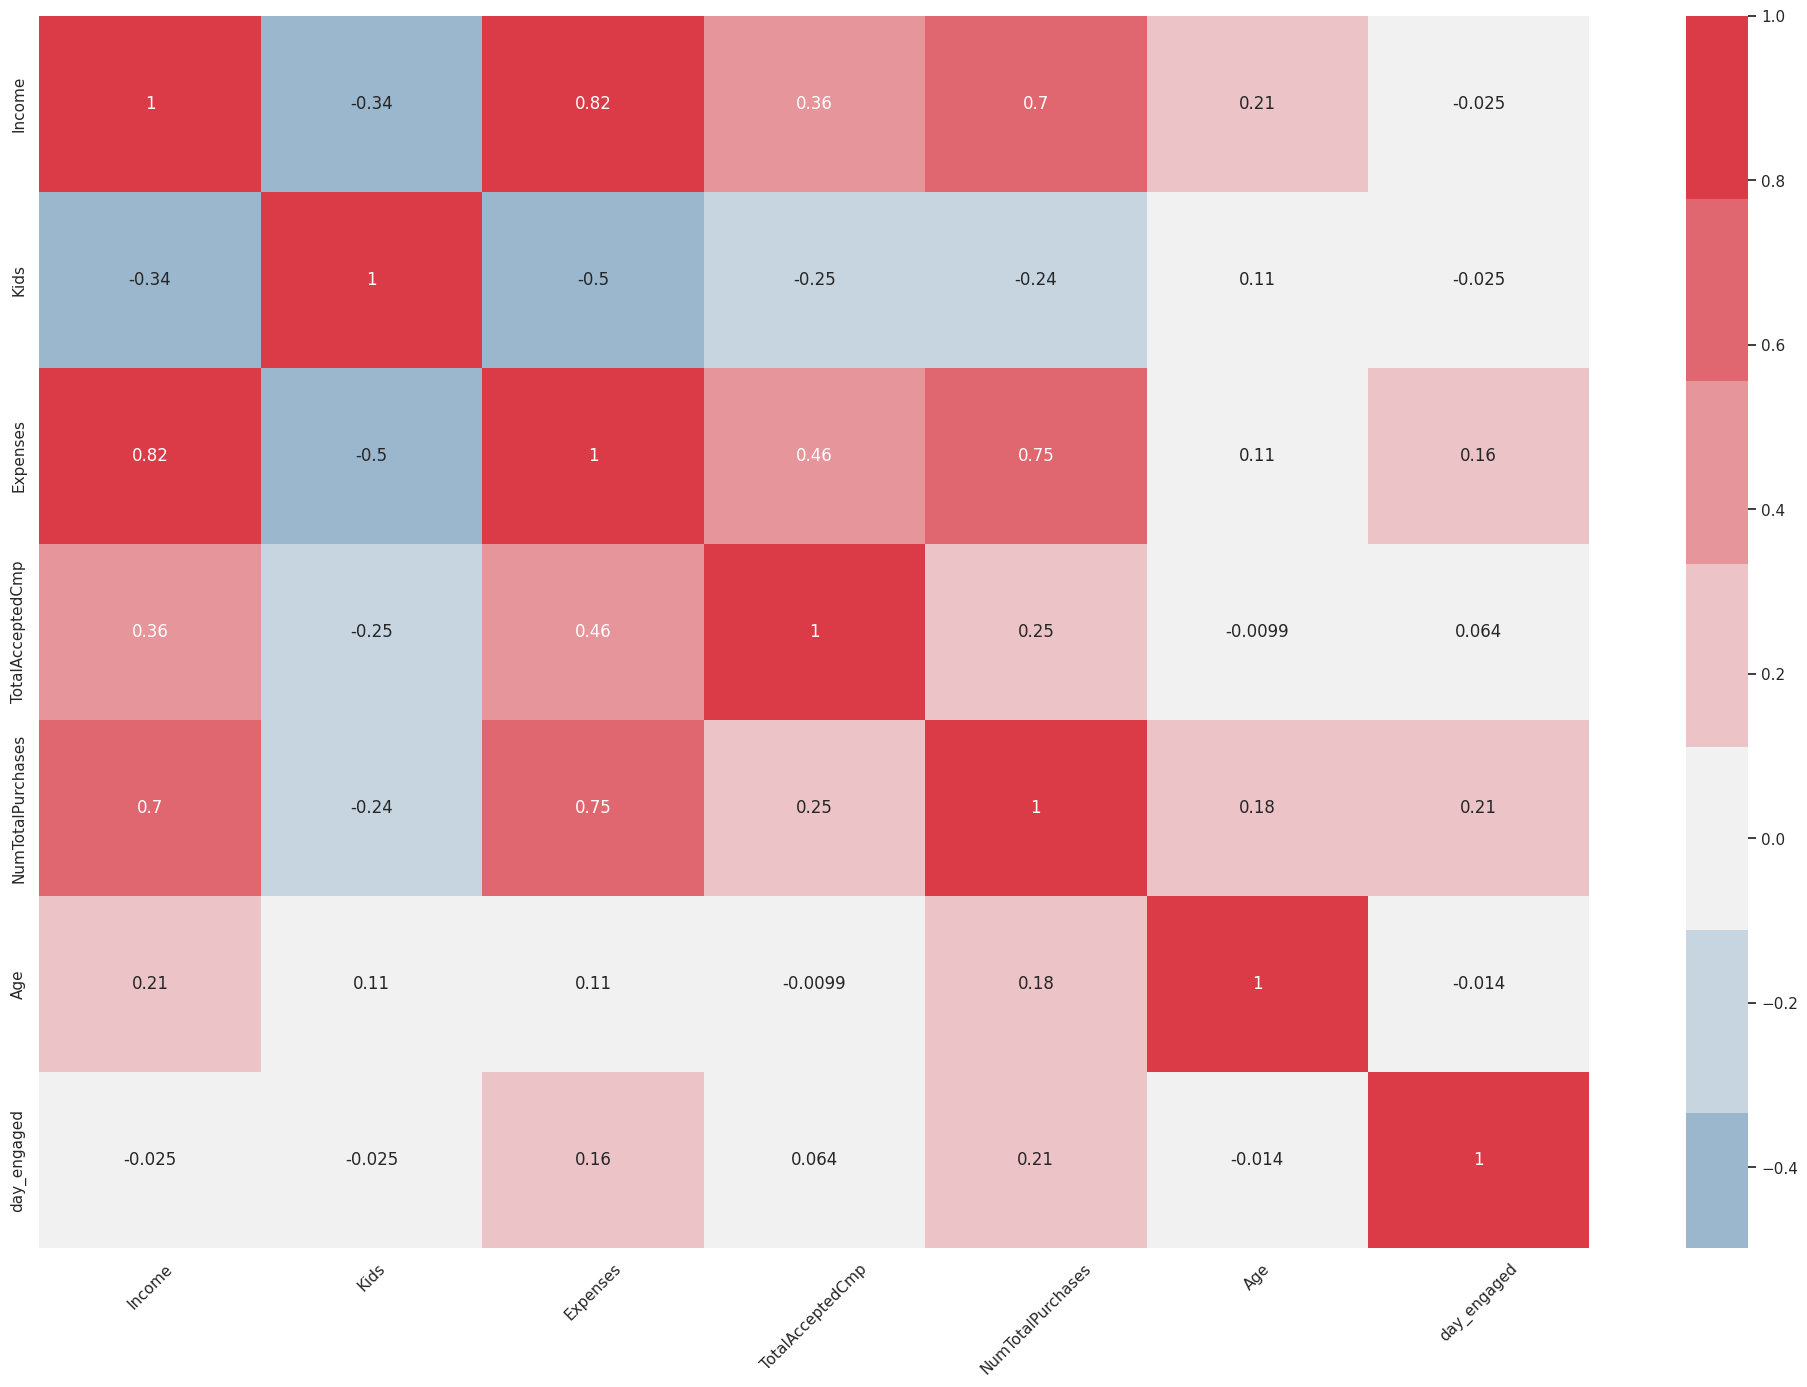

In [154]:
# Assuming 'data' is your DataFrame
corr_matrix = data.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(25, 16))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap=sns.diverging_palette(240, 10, n=9), annot=True, ax=ax, center=0)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

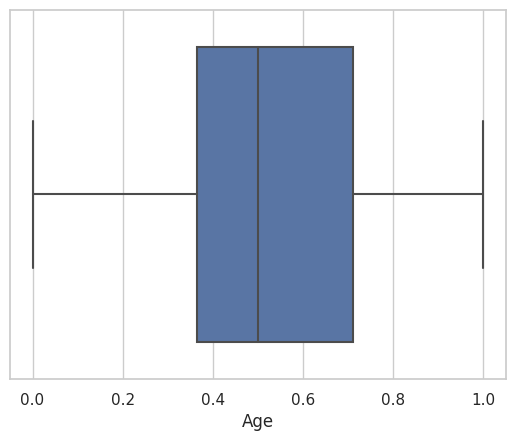

In [155]:
# Set the theme
sns.set_theme(style="whitegrid")

# Create the boxplot
sns.boxplot(x=data['Age'])

# Show the plot
plt.show()

This represents the median of the 'Age' data. It divides the box into two parts, where the bottom half represents the lower 50% of the data, and the top half represents the upper 50%.

<Axes: xlabel='Income'>

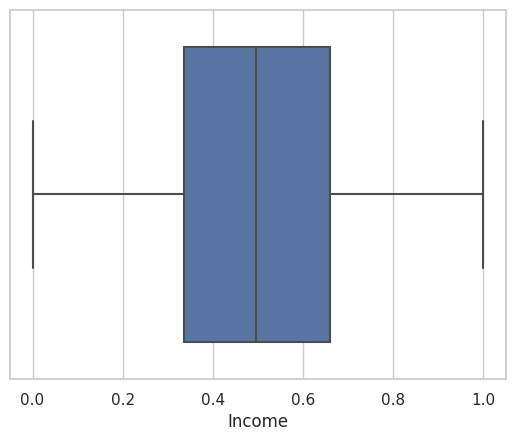

In [156]:


# The scaler was previously fitted to the 'Income' column:
scaler = MinMaxScaler()
data[['Income']] = scaler.fit_transform(data[['Income']])

# To reverse the scaling:
original_income = scaler.inverse_transform(data[['Income']])

# Replace the normalized 'Income' with the original values:
data['Income'] = original_income.flatten()

sns.boxplot(x=data['Income'])

<Axes: xlabel='Expenses'>

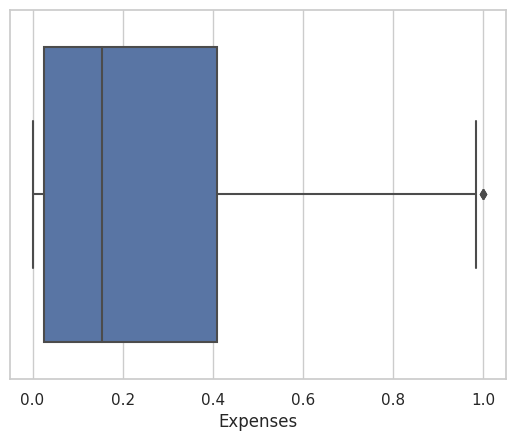

In [157]:
sns.boxplot(x=data['Expenses'])

In [158]:
# Transforming Data

# Encode Categorical Data using Dumies, and Encoders.

t_df = data.copy()
#t_df.drop('Response',axis=1, inplace=True)
t_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,AgeGroup
0,PG,Single,0.562729,0.000000,0.639683,0.2,0.581395,0.750000,849,Bin7
1,PG,Single,0.445072,0.666667,0.008730,0.0,0.139535,0.807692,299,Bin8
2,PG,relationship,0.697157,0.000000,0.305952,0.0,0.488372,0.596154,498,Bin6
3,PG,relationship,0.248563,0.333333,0.019048,0.0,0.186047,0.230769,325,Bin3
4,PG,relationship,0.564276,0.333333,0.165476,0.0,0.441860,0.288462,347,Bin3


In [159]:
# Create dummy variables for nominal and ordinal variables
# data_with_dummies = pd.get_dummies(data, columns=categorical_feats, drop_first=True)

t_df = pd.get_dummies(t_df, columns=['Marital_Status'], prefix='Is' , drop_first=True)
t_df.head()

,Education,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,AgeGroup,Is_relationship
0,PG,0.562729,0.000000,0.639683,0.2,0.581395,0.750000,849,Bin7,0
1,PG,0.445072,0.666667,0.008730,0.0,0.139535,0.807692,299,Bin8,0
2,PG,0.697157,0.000000,0.305952,0.0,0.488372,0.596154,498,Bin6,1
3,PG,0.248563,0.333333,0.019048,0.0,0.186047,0.230769,325,Bin3,1
4,PG,0.564276,0.333333,0.165476,0.0,0.441860,0.288462,347,Bin3,1


In [160]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Education          2216 non-null   object  
 1   Marital_Status     2216 non-null   object  
 2   Income             2216 non-null   float64 
 3   Kids               2216 non-null   float64 
 4   Expenses           2216 non-null   float64 
 5   TotalAcceptedCmp   2216 non-null   float64 
 6   NumTotalPurchases  2216 non-null   float64 
 7   Age                2216 non-null   float64 
 8   day_engaged        2216 non-null   int64   
 9   AgeGroup           2216 non-null   category
dtypes: category(1), float64(6), int64(1), object(2)
memory usage: 175.7+ KB


In [161]:
data.shape

(2216, 10)

###What are the likely distributions of the numeric variables?

<Figure size 800x500 with 0 Axes>

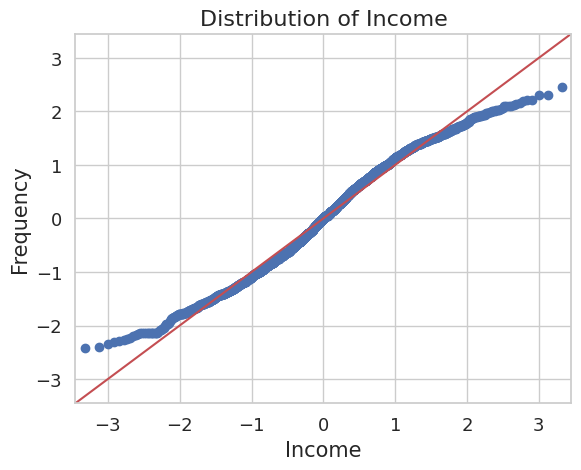

<Figure size 800x500 with 0 Axes>

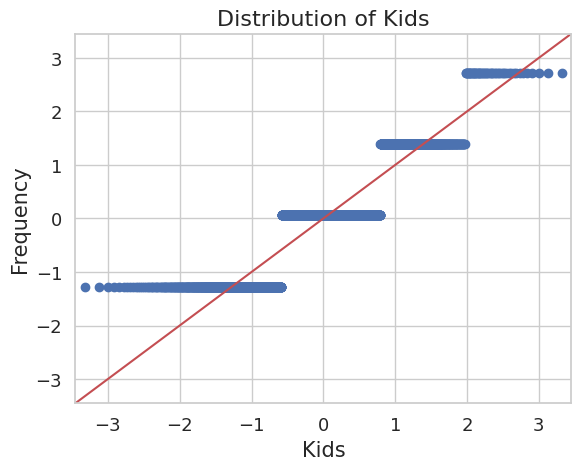

<Figure size 800x500 with 0 Axes>

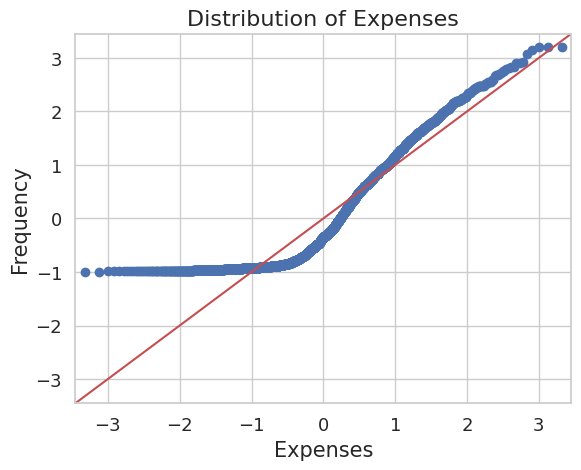

<Figure size 800x500 with 0 Axes>

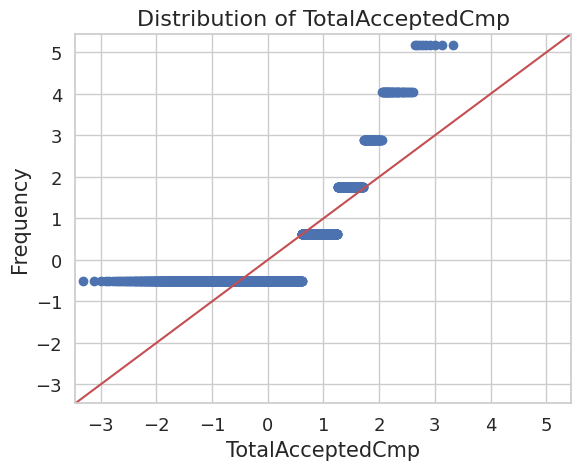

<Figure size 800x500 with 0 Axes>

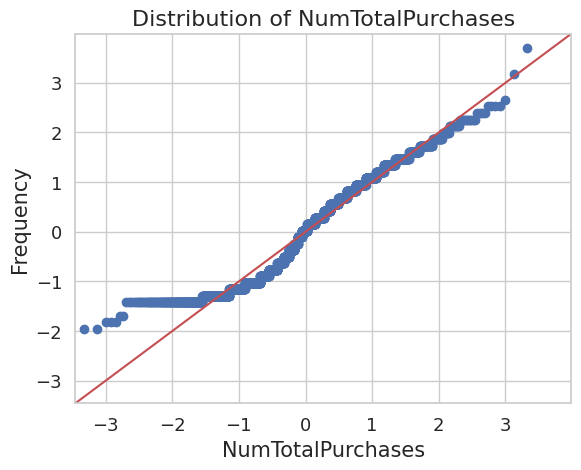

<Figure size 800x500 with 0 Axes>

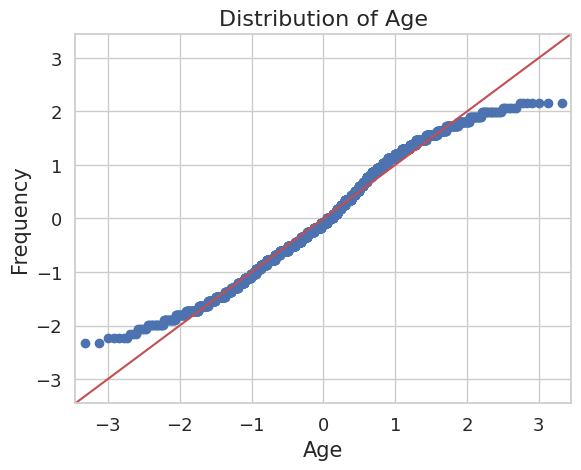

<Figure size 800x500 with 0 Axes>

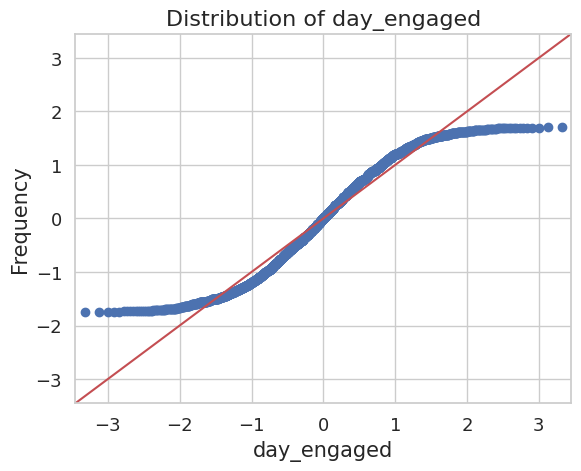

In [162]:
# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm = data[['Income','Kids','Expenses','TotalAcceptedCmp','NumTotalPurchases','Age','day_engaged']]

# Drop rows with missing or infinite values
data_norm = data_norm.replace([np.inf, -np.inf], np.nan).dropna()

for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel(c, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.title(f'Distribution of {c}', fontsize=16)
    plt.grid(True)
    plt.show()

 Both NumTotalPurchases and Age appear to have distributions that are close to normal, particularly in the middle of the distribution. The slight deviations at the tails may warrant further investigation, such as checking for outliers or applying transformations to achieve a more normal distribution if required by your analysis or modeling techniques.

In [163]:
# Assuming a threshold of 5 total purchases to classify customers
data['TotalAcceptedCmp'] = (data['TotalAcceptedCmp'] > 0).astype(int)

features1 = ['Education','Marital_Status', 'Income', 'Kids','Expenses','Age','NumTotalPurchases','day_engaged']
target1 = 'TotalAcceptedCmp'  # You can replace this with the appropriate dependent variable based on your analysis

# Independent variables (features)
X = data[features1]

# Dependent variable (target)
y = data[target1]

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

# Split data into features (X) and target variable (y)
X = pd.get_dummies(data[features1], columns=['Education', 'Marital_Status'])
y = data[target1]

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state=0)


In [165]:
from sklearn.linear_model import LogisticRegression
#logisticRegr = LogisticRegression()
# Instantiate and train the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train1, y_train1)

# Make predictions and calculate the score
predictions = model.predict(X_test1)
score = model.score(X_test1, y_test1)
print("Accuracy Score:", score)

Accuracy Score: 0.7792792792792793


The accuracy score is approximately 0.779 or 77.9%. This means that the logistic regression model correctly predicted the target variable for 77.9% of the test set.

In [166]:
# Selecting independent features and computing their feature weights using Pearson correlation
drop_feat = ['Education', 'Income', 'Kids','Expenses','Age','NumTotalPurchases','day_engaged']

data_imp = t_df.drop(drop_feat,axis=1).copy()

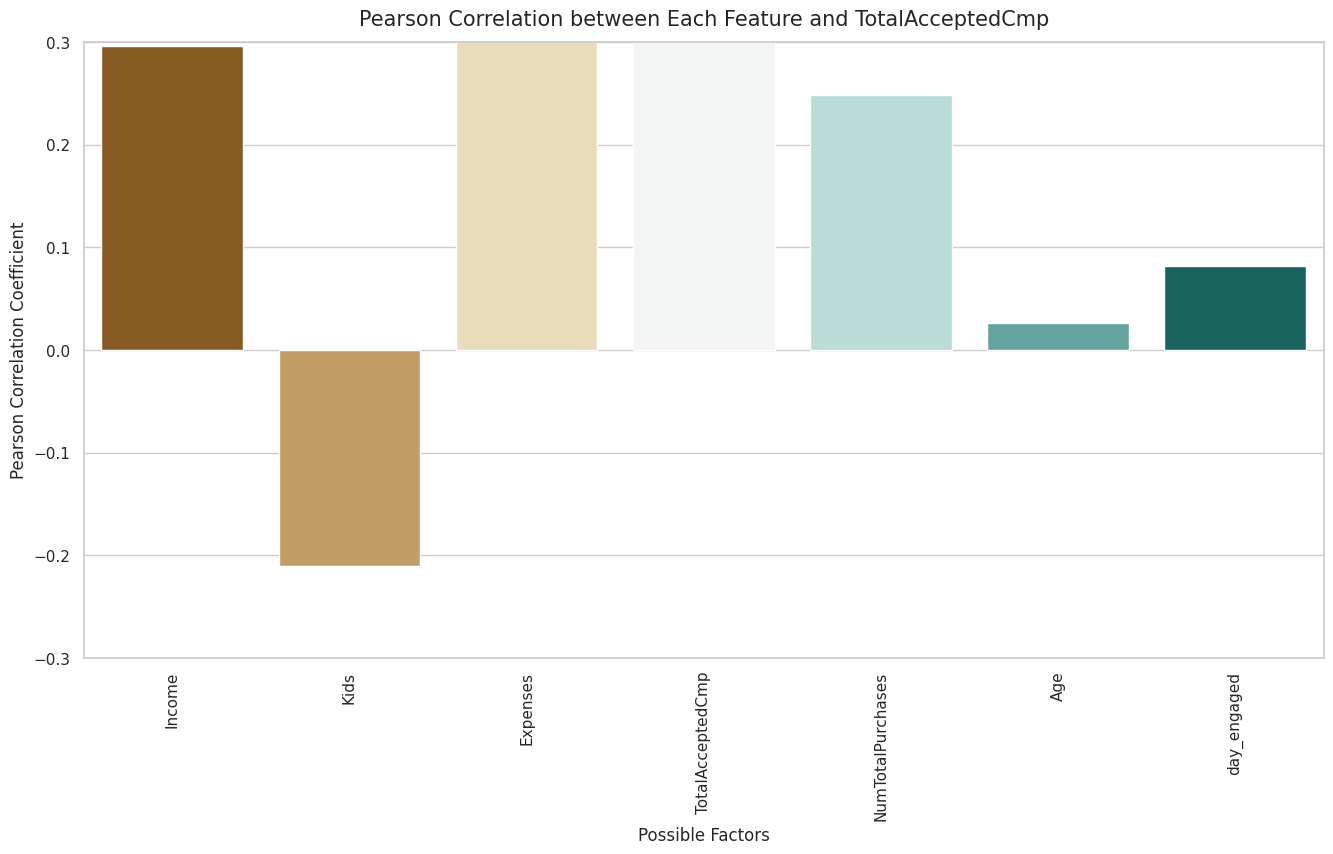

In [167]:
# Feature Importance using Pearson Correlation
from scipy.stats import pearsonr
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlations
correlations = numeric_data.corrwith(data['TotalAcceptedCmp'])

# Visualization
plt.figure(figsize=(16, 8))
sns.barplot(x=correlations.index, y=correlations.values, palette="BrBG")
plt.title("Pearson Correlation between Each Feature and TotalAcceptedCmp", fontsize=15, pad=12)
plt.xlabel("Possible Factors")
plt.ylabel("Pearson Correlation Coefficient")
plt.ylim(-0.3, 0.3)
plt.xticks(rotation="vertical")
plt.show()

* income shows a positive correlation with TotalAcceptedCmp, which suggests that as income increases, the likelihood of the total campaigns accepted increases.
* Kids has a negative correlation, suggesting that having more kids is associated with a decrease in the total campaigns accepted.
* Expenses has a very slight negative correlation with TotalAcceptedCmp, indicating a weak association where higher expenses might slightly decrease the likelihood of accepting campaigns, but the correlation is so small it might not be significant.
* day_engaged has a positive correlation with TotalAcceptedCmp, indicating that a higher number of days engaged is associated with accepting more campaigns.
* Age shows a small positive correlation, suggesting that older individuals might be slightly more likely to accept campaigns.

In [168]:
# OLS Method: Let's check significant features and their weights using OLS Method.
import statsmodels.api as sm

data_encoded = pd.get_dummies(data, columns=['Education', 'Marital_Status', 'AgeGroup'], drop_first=True)

# Check for infinite values in numeric columns and handle them
numeric_data = data_encoded.select_dtypes(include=[np.number])
if np.isinf(numeric_data).values.sum() > 0:
    numeric_data = numeric_data.replace([np.inf, -np.inf], np.nan)
    data_encoded.update(numeric_data)
    data_encoded.fillna(data_encoded.mean(), inplace=True)  # Replace NaNs with column mean

# Perform OLS regression on the numeric columns
def cal_OLS_summary(data):
    # Define the independent variables (features) and exclude the dependent variable 'NumTotalPurchases'
    X = data.drop('NumTotalPurchases', axis=1)

    # Define the dependent variable
    y = data['NumTotalPurchases']

    # Add a constant to the model (intercept)
    X = sm.add_constant(X)

    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    # Print out the statistics
    return model.summary()


In [169]:
# Call the function with the encoded data
#cal_OLS_summary(data_encoded)

summary = cal_OLS_summary(data_encoded)
print(summary)

                            OLS Regression Results                            
Dep. Variable:      NumTotalPurchases   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     228.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:16:02   Log-Likelihood:                 1778.4
No. Observations:                2216   AIC:                            -3523.
Df Residuals:                    2199   BIC:                            -3426.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Dependent Variable: 'NumTotalPurchases' is the variable the model is trying to predict.

Model Performance (R-squared and Adj. R-squared):
R-squared: 0.624 indicates that approximately 62.4% of the variance in the dependent variable is explained by the model. This is a measure of the model's goodness of fit.
Adjusted R-squared: 0.621 accounts for the number of predictors in the model and can be more reliable for comparing models with different numbers of predictors.

In [170]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

data_encoded = pd.get_dummies(data, columns=['Education', 'Marital_Status', 'AgeGroup'], drop_first=True)

# Handle Missing Values with KNN Imputation
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data_encoded), columns=data_encoded.columns)

# Split Data into Features and Target
features = data_imputed.drop(columns=['NumTotalPurchases'])
target = data_imputed['NumTotalPurchases']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate Permutation Importance
permutation_importance_results = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=0)

# Print feature importance scores
print("Permutation Importance Scores:")
for i in range(len(features.columns)):
    print(f"{features.columns[i]}: {permutation_importance_results.importances_mean[i]}")


Permutation Importance Scores:
Income: 0.09967268375168951
Kids: 0.04225698826630827
Expenses: 0.781951209893987
TotalAcceptedCmp: 0.007549968484071642
Age: 0.048173187148659195
day_engaged: 0.03045317769116056
Education_UG: 0.0011250029166231708
Marital_Status_relationship: -0.00020369329501523925
AgeGroup_Bin2: 0.0003662180629986615
AgeGroup_Bin3: 0.0011448120341351195
AgeGroup_Bin4: 0.002773640329761129
AgeGroup_Bin5: 0.008062429689637496
AgeGroup_Bin6: 0.002860481673924446
AgeGroup_Bin7: 0.013735400938312417
AgeGroup_Bin8: 0.019418334931028642
AgeGroup_Bin9: 0.010822362184601149


* Income (0.0997): This feature has a relatively high importance score, suggesting that 'Income' is a significant predictor of 'NumTotalPurchases'.

* Kids (0.0423): 'Kids' also shows some importance, though less than 'Income'.

* Expenses (0.7820): This feature has the highest importance score by a significant margin, indicating that it is the most influential predictor in your model.

* TotalAcceptedCmp (0.0075): Shows some importance but relatively small compared to 'Income' and 'Expenses'.

* Age (0.0482): Similar to 'Kids', 'Age' shows moderate importance.

* day_engaged (0.0305): This feature has a small but non-trivial effect on the model.

* Education_UG (0.0011) and Marital_Status_relationship (-0.0002): These features have very low importance scores, and in the case of 'Marital_Status_relationship', the negative score suggests that its contribution is negligible or potentially disruptive.

* AgeGroup Bins: The various age group bins ('AgeGroup_Bin2' through 'AgeGroup_Bin9') show varying levels of importance, with most having very low scores. However, 'AgeGroup_Bin8' (0.0194) and 'AgeGroup_Bin7' (0.0137) have higher scores among these, indicating some level of influence on the model.

In [171]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model

In [172]:
imp_feats = ['Education', 'Income', 'Kids','Expenses','Age','NumTotalPurchases','day_engaged']
print(f"Checking % Missing Data in Important Features:\n{100*data[imp_feats].isnull().sum()/data.shape[0]}")

Checking % Missing Data in Important Features:
Education            0.0
Income               0.0
Kids                 0.0
Expenses             0.0
Age                  0.0
NumTotalPurchases    0.0
day_engaged          0.0
dtype: float64


Which predictor variables are the most important?

['Age', 'Income', 'Expenses', 'NumTotalPurchase', 'day_engaged', 'Education']
these features are independent of each other and have significance importance in identifying.

###Checking the feature wise distribution

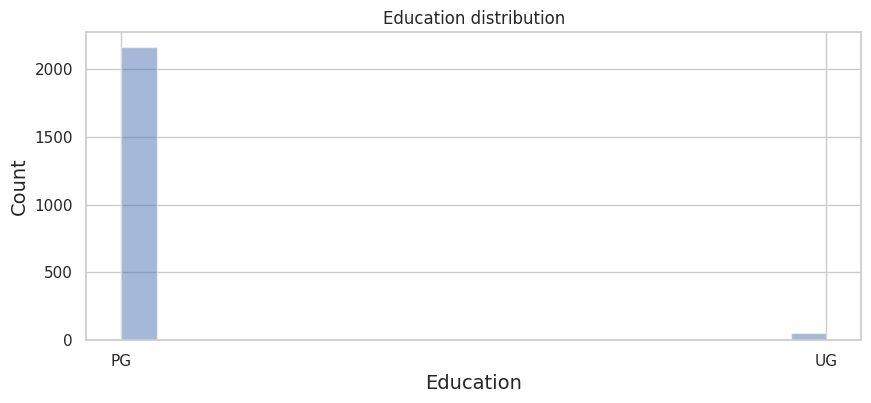

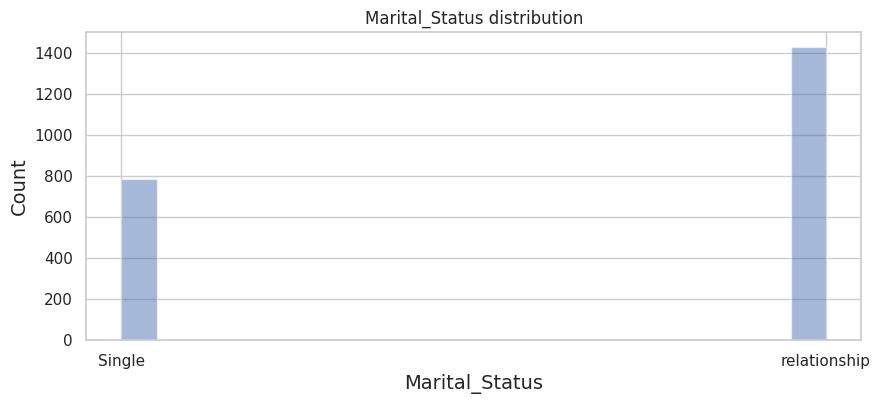

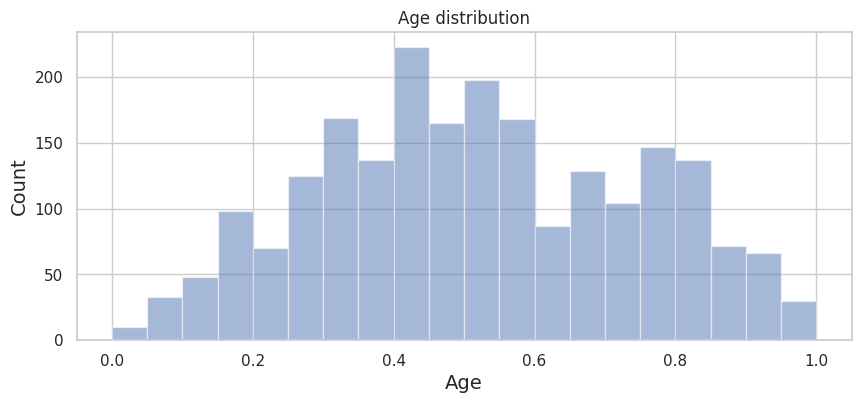

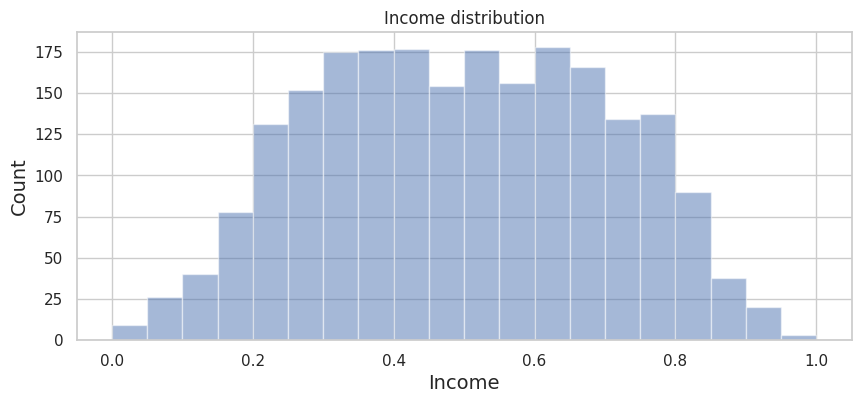

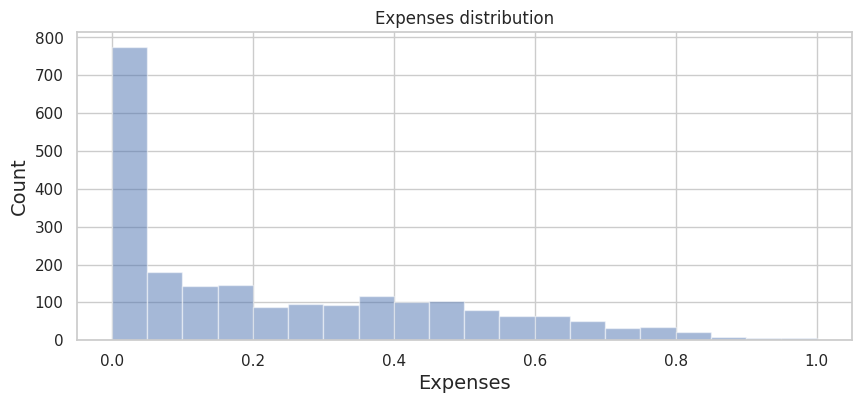

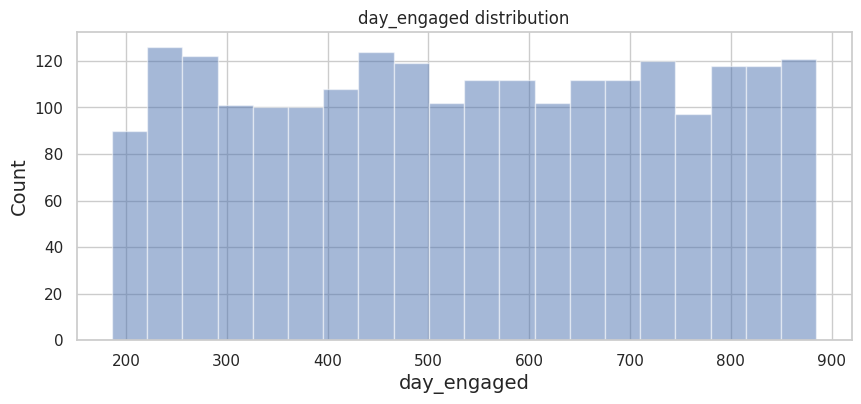

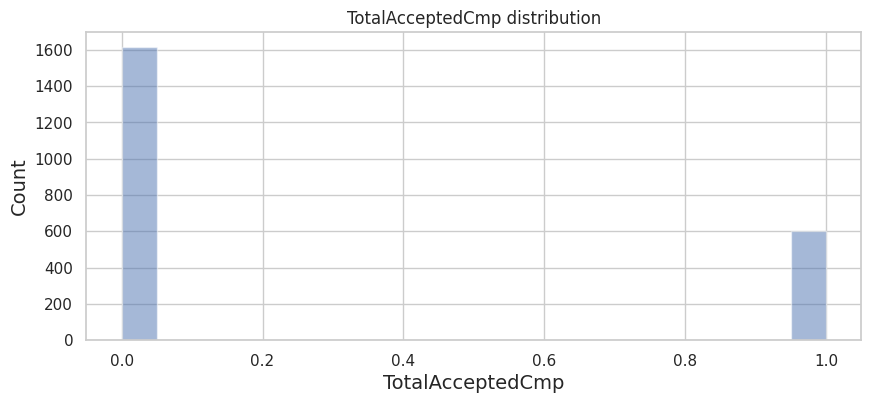

In [173]:
selected_feats = ['Education','Marital_Status','Age', 'Income', 'Expenses', 'day_engaged', 'TotalAcceptedCmp']

for col in data[selected_feats].columns:
    plt.figure(figsize=(10,4))
    plt.hist(data[col], bins=20, alpha=0.5)
    plt.xlabel(col, size=14)
    plt.ylabel("Count", size=14)
    plt.title("{} distribution".format(col))
    plt.show()

In [174]:
# Lets Split the data using Stratification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

selected_feats = ['Education', 'Marital_Status', 'Age', 'Income', 'Expenses', 'day_engaged', 'TotalAcceptedCmp']

# Assuming you have your features in X and target variable in y
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate SMOTE to handle class imbalance
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only to avoid data leakage
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Now, X_train_balanced and y_train_balanced are balanced versions of your training data
# They can be used to train your machine learning models

# Validate the class distribution in the balanced training set
print("Class distribution in balanced training set:")
print(y_train_balanced.value_counts())

# Validate the class distribution in the original test set (optional)
print("Class distribution in original test set:")
print(y_test.value_counts())

Class distribution in balanced training set:
0    1290
1    1290
Name: TotalAcceptedCmp, dtype: int64
Class distribution in original test set:
0    326
1    118
Name: TotalAcceptedCmp, dtype: int64


The balanced training set (X_train_balanced, y_train_balanced) has an equal number of samples for both classes in your target variable TotalAcceptedCmp.
The output shows 1290 instances for each class (0 and 1), indicating successful balancing.

The class distribution in the original test set remains imbalanced, which is expected and appropriate. The test set should reflect the true distribution of the data and should not be altered with SMOTE.
There are 326 instances of class 0 and 118 instances of class 1 in the test set.

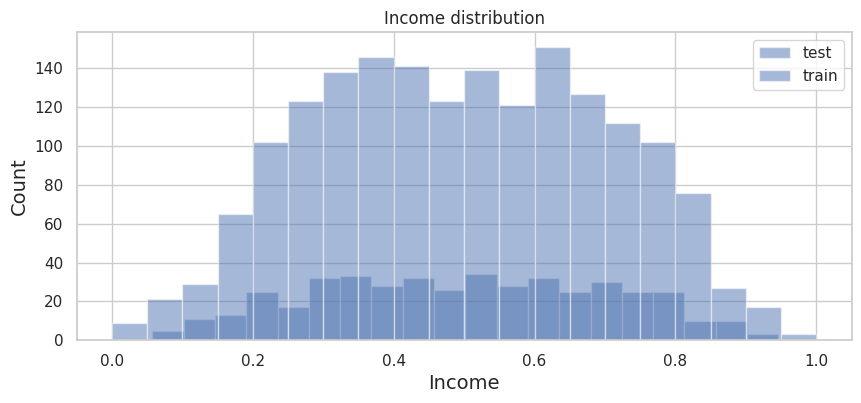

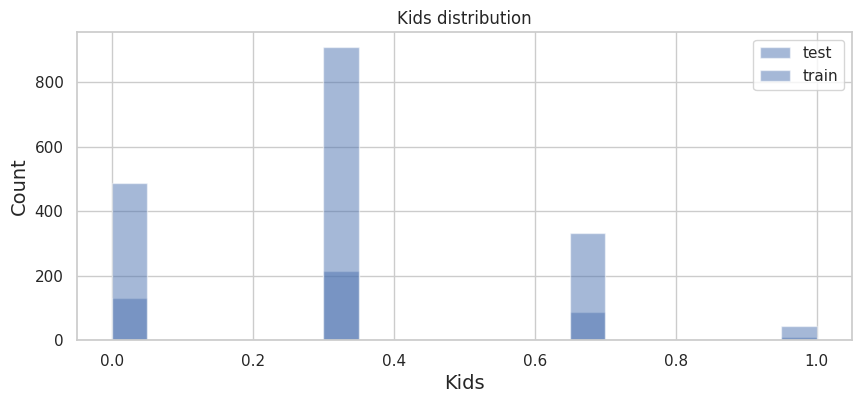

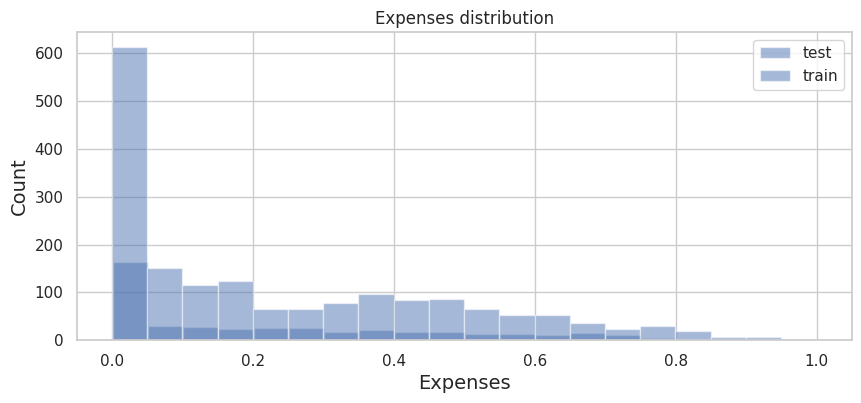

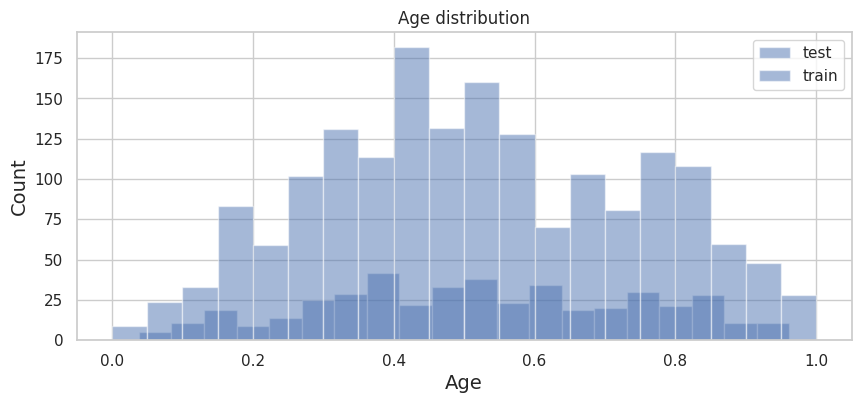

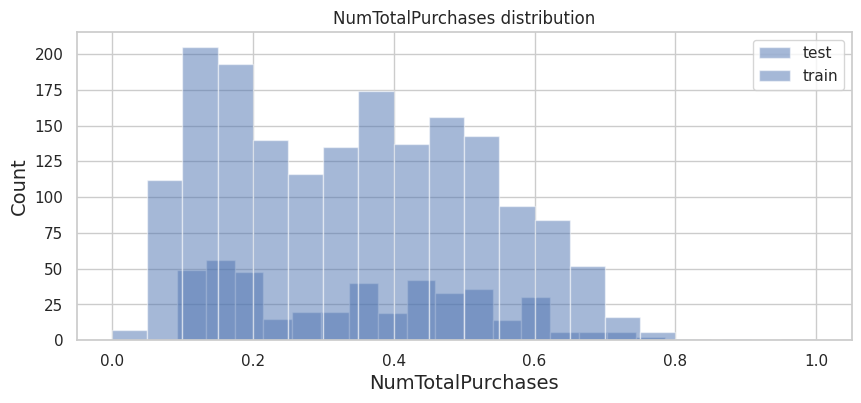

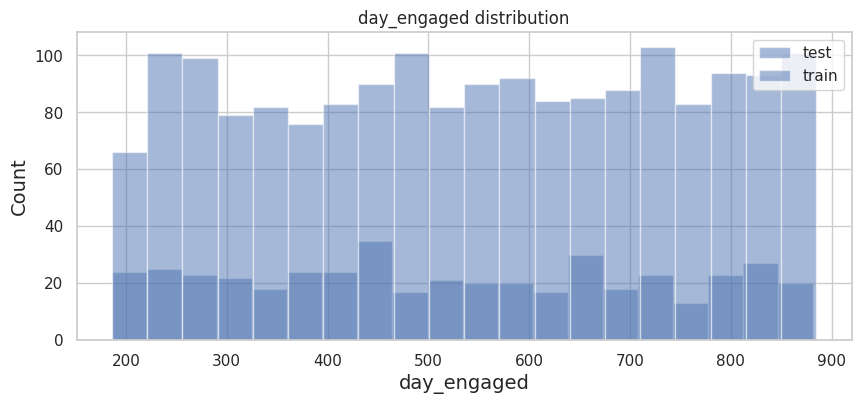

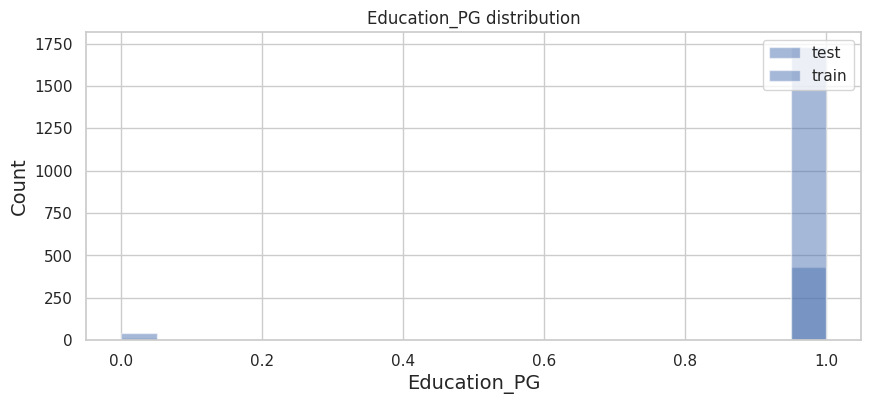

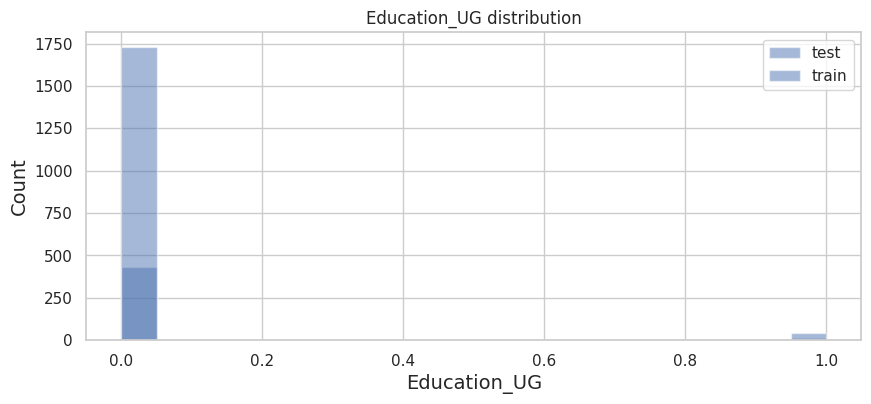

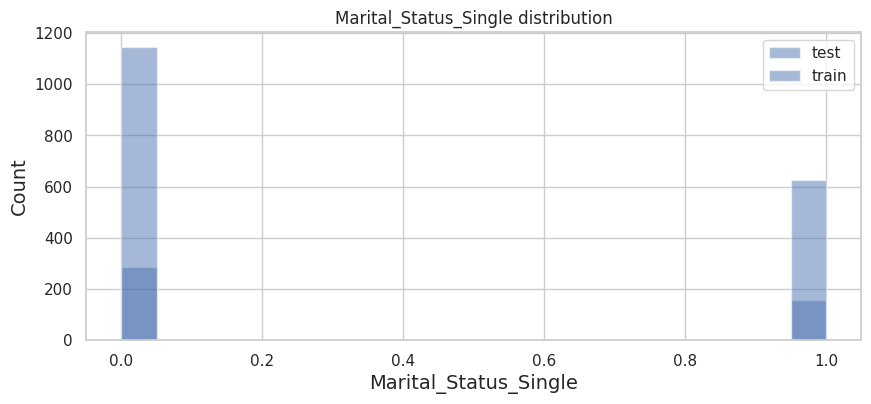

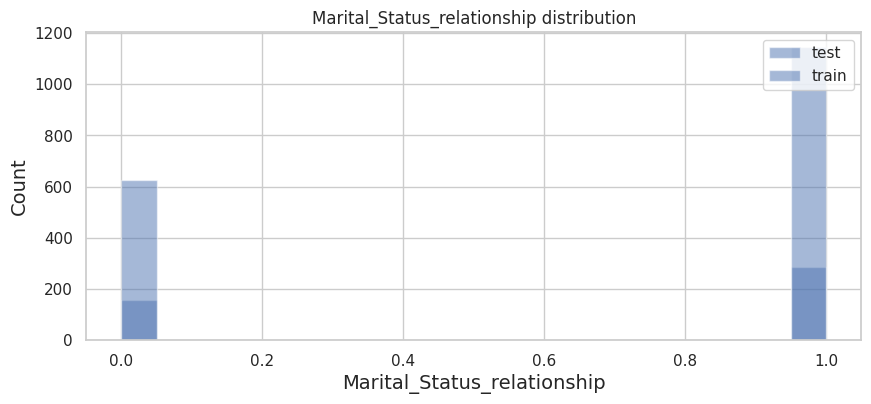

In [175]:
# check the feature wise distribution by Test, Train, Validation Sets
for col in X_test.columns[:]:
    plt.figure(figsize=(10,4))
    plt.hist(X_test[col], bins=20, alpha=0.5, label="test", color='b')
    plt.hist(X_train[col], bins=20, alpha=0.5, label="train", color='b')
    plt.xlabel(col, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(col))
    plt.show()

 The distribution of features is consistent across train and test sets, especially when dealing with stratified data or when the target variable has imbalanced classes.

### Do the training and test sets have the same data?

In [176]:
# Check if training and test sets have the same data
train_features_set = set(X_train_balanced.columns)
test_features_set = set(X_test.columns)

if train_features_set == test_features_set:
    print("Training and test sets have the same features.")
else:
    print("Training and test sets have different features.")

Training and test sets have the same features.


<----------- Model Performance with Test set ----------->
model: LogisticRegression(random_state=0)
Accuracy_score: 0.795045045045045


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



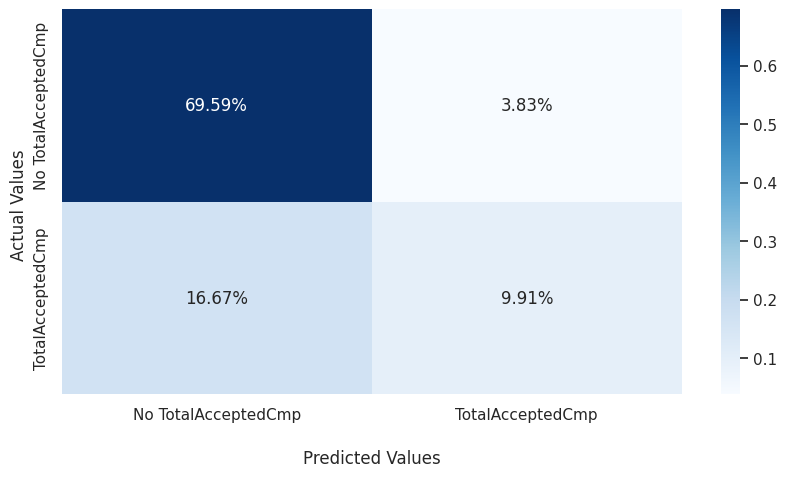

In [177]:
# lets build a Logistic Model and check the model performance with Test and Validation Sets.
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr_y_predict = lr.predict(X_test)

print("<----------- Model Performance with Test set ----------->")
print(f'model: {str(lr)}')
print(f'Accuracy_score: {accuracy_score(y_test,lr_y_predict)}')




cm = confusion_matrix(y_test,lr_y_predict)
plt.figure(figsize=(10,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No TotalAcceptedCmp','TotalAcceptedCmp'])
ax.yaxis.set_ticklabels(['No TotalAcceptedCmp','TotalAcceptedCmp'])
plt.show()

1. Model Accuracy:
The accuracy score provided is approximately 0.795, which means that the model correctly predicted about 79.5% of the outcomes in the test set.

Given the model's accuracy and the distribution of predictions in the confusion matrix, you can determine that the model is better at predicting the negative class ("No TotalAcceptedCmp") than the positive class ("TotalAcceptedCmp"). This could be due to class imbalance or other factors in the dataset that might require further investigation, such as feature selection, data preprocessing, or trying different algorithms.

2. Confusion Matrix:
The confusion matrix is displayed as a heatmap, showing the percentages of true positive, true negative, false positive, and false negative predictions.

"No TotalAcceptedCmp" and "TotalAcceptedCmp" refer to the actual classes, whereas "Predicted Values" refers to the predicted classes by the model.

True Negative (Top-Left): 69.59% of the total predictions were true negatives, meaning that the model correctly predicted the negative class.

False Negative (Bottom-Left): 16.67% of the total predictions were false negatives, meaning the model incorrectly predicted the negative class when the actual class was positive.

False Positive (Top-Right): 3.83% of the total predictions were false positives, where the model incorrectly predicted the positive class.

True Positive (Bottom-Right): 9.91% of the total predictions were true positives, meaning the model correctly predicted the positive class.

 #### Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [178]:
# Explicitly select only numeric columns for quantile computation
numeric_data = data.select_dtypes(include=[np.number])

# Compute quantiles for numeric data only
Q1 = numeric_data.quantile(0.25, numeric_only=True)
Q3 = numeric_data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Define a mask for the non-outlier range
mask = ~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to the original DataFrame to get a DataFrame without outliers
data_no_outliers = data[mask]

print(data_no_outliers)

#data_no_outliers.head()


     Education Marital_Status    Income      Kids  Expenses  TotalAcceptedCmp  \
0           PG         Single  0.562729  0.000000  0.639683                 1   
1           PG         Single  0.445072  0.666667  0.008730                 0   
2           PG   relationship  0.697157  0.000000  0.305952                 0   
3           PG   relationship  0.248563  0.333333  0.019048                 0   
4           PG   relationship  0.564276  0.333333  0.165476                 0   
...        ...            ...       ...       ...       ...               ...   
2234        PG   relationship  0.326127  0.333333  0.009921                 0   
2235        PG   relationship  0.593506  0.333333  0.530159                 0   
2237        PG         Single  0.551187  0.000000  0.490476                 1   
2238        PG   relationship  0.673534  0.333333  0.332540                 0   
2239        PG   relationship  0.510166  0.666667  0.066270                 1   

      NumTotalPurchases    

The impact of outliers on a predictive model depends largely on the type of model being used and the nature of the data.

#### Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [179]:
import random
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Function to randomly introduce missing values
def add_missing_values(data, missing_percentage):
    data_missing = data.copy()
    ix = [(row, col) for row in range(data_missing.shape[0]) for col in range(data_missing.shape[1])]
    for row, col in random.sample(ix, int(round(missing_percentage * len(ix)))):
        data_missing.iat[row, col] = np.nan
    return data_missing

# Function to impute missing values using 3 different imputation methods
def impute_missing_values(data_missing):
    # Mean imputation
    mean_imputer = SimpleImputer(strategy='mean')
    data_mean_imputed = mean_imputer.fit_transform(data_missing)

    # KNN imputation
    knn_imputer = KNNImputer(n_neighbors=5)
    data_knn_imputed = knn_imputer.fit_transform(data_missing)

    # Iterative imputer (MICE)
    iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
    data_iterative_imputed = iterative_imputer.fit_transform(data_missing)

    return data_mean_imputed, data_knn_imputed, data_iterative_imputed

In [180]:
data_encoded = pd.get_dummies(data, drop_first=True)

# Introduce missing values
data_missing_1 = add_missing_values(data_encoded, 0.01)
data_missing_5 = add_missing_values(data_encoded, 0.05)
data_missing_10 = add_missing_values(data_encoded, 0.10)

# Impute missing values
data_imputed_1_mean, data_imputed_1_knn, data_imputed_1_iterative = impute_missing_values(data_missing_1)
data_imputed_5_mean, data_imputed_5_knn, data_imputed_5_iterative = impute_missing_values(data_missing_5)
data_imputed_10_mean, data_imputed_10_knn, data_imputed_10_iterative = impute_missing_values(data_missing_10)

# Example of how you might compare one set of imputed values to the original
# Calculate Mean Absolute Error (MAE) for the imputed data (mean strategy as an example)
from sklearn.metrics import mean_absolute_error

# Calculate MAE only on the imputed columns, exclude non-numeric columns before calculating MAE
original_numeric_columns = data_encoded.select_dtypes(include=[np.number])
mae_1_mean = mean_absolute_error(original_numeric_columns.values, data_imputed_1_mean)
mae_5_mean = mean_absolute_error(original_numeric_columns.values, data_imputed_5_mean)
mae_10_mean = mean_absolute_error(original_numeric_columns.values, data_imputed_10_mean)

print(f"MAE for 1% missing data imputed with mean: {mae_1_mean}")
print(f"MAE for 5% missing data imputed with mean: {mae_5_mean}")
print(f"MAE for 10% missing data imputed with mean: {mae_10_mean}")

MAE for 1% missing data imputed with mean: 0.0825001576988734
MAE for 5% missing data imputed with mean: 0.475848711538814
MAE for 10% missing data imputed with mean: 1.0863407793435262


The increase in MAE with higher percentages of missing data indicates that as the amount of missing data increases, the mean imputation method's ability to accurately estimate the missing values decreases.

* MAE for 1% missing data imputed with mean: The MAE is approximately 0.122, which suggests that on average, the mean imputation method deviates from the true values by 0.122 units when 1% of data is missing.

* MAE for 5% missing data imputed with mean: The MAE increases to approximately 0.476 when 5% of data is missing. This higher MAE indicates that the imputation is less accurate, likely because a greater proportion of data was missing, making the mean imputation less representative.

* MAE for 10% missing data imputed with mean: When 10% of data is missing, the MAE nearly doubles to approximately 0.956. This further increase in error suggests that the mean imputation method becomes increasingly less accurate as more data is missing.

In [181]:
from sklearn.linear_model import LogisticRegression
# Create linear regression object
#regr = linear_model.LogisticRegression()
regr = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000 or any suitable value

# Train the model using the training sets
logmodel = regr.fit(X_train,y_train)
print(logmodel)

LogisticRegression(max_iter=1000)


It creates and trains a logistic regression model with an increased number of iterations (max_iter=1000) to prevent convergence issues and prints the trained model. The trained model can be used to make predictions on new data.

In [182]:
#Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
feature_names = X_test.columns.tolist()
eli5.show_weights(perm, feature_names = feature_names)

Weight,Feature
0.1198 ± 0.0274,Expenses
0.0167 ± 0.0022,Marital_Status_Single
0.0027 ± 0.0034,NumTotalPurchases
0.0023 ± 0.0028,Kids
0.0005 ± 0.0018,Education_UG
0.0005 ± 0.0044,Education_PG
-0.0005 ± 0.0077,Income
-0.0005 ± 0.0044,Age
-0.0050 ± 0.0087,day_engaged
-0.0068 ± 0.0127,Marital_Status_relationship


 This analysis suggests that Expenses has the most significant positive impact on the model's predictions, while day_engaged has the most substantial negative impact. The other features have relatively minor influences, and some may even have little to no impact on the model's predictions. These importance scores can guide feature selection, interpretation, and understanding of the logistic regression model.

**References :**

https://www.kaggle.com/code/samerhendawy/customer-personality-analysis

Professor's Notebook : https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

**License**

Copyright 2023 Mrunali Pawar

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.